# 🚨🚨🚨 LEIA-ME 🚨🚨🚨

Se estiver utilizando o Google Colab.

Antes de iniciar a execução do código, é importante alterar a versão do runtime para a que possui o Python na versão 3.11.*, que atualmente segue sendo a versão "2025.07".

Logo abaixo mostro como alterar a versão do Runtime.

![Acesse o Runtime](https://i.imgur.com/EOQ8KvA.png)

Clique no menu Runtime (Ambiente de execução). Vai abrir um dropdown, nele você deve clicar na opção "Change runtime type" (Trocar tipo de ambiente de execução).

![Trocar tipo do Runtime](https://i.imgur.com/XYCBjPZ.png)

Vai abrir um modal, nele você deve apenas selecionar a opção no select de "Runtime version" (Versões do ambiente de execução) que tenha o nome "2025.07".

Olhando na [documentação](https://research.google.com/colaboratory/runtime-version-faq.html#2025.07) você pode observar que a versão do python é a que necessitamos (3.11.*).

![Alterar versão](https://i.imgur.com/kz9XhDD.png)

O motivo da troca de versão é porque temos dependências que não foram disponiilizadas para as versões mais recentes do python.

![]()

# Informações sobre o projeto

## Integrantes

Os integrantes desse projeto são:
- [Rhogger Freitas Silva](https://www.linkedin.com/in/rhogger-fs/)
- [José Henrique Queiroz de Souza](https://www.linkedin.com/in/josehenriqve/)
- [Mateus Abreu da Cunha Nascimento](https://www.linkedin.com/in/mateusabreucn/)
- [Felipe Peretti](https://www.linkedin.com/in/felipeperetti/)

## Sobre o projeto

Este é um projeto desenvolvido durante a disciplina "Projeto de Ciência de Dados" da pós-graduação de Data Science & Machine Learning da UniRV.

<br>

O foco da disciplina é criar um projeto completo de ciência de dados para aplicarmos os conhecimentos obtidos ao longo do curso e apresentá-lo à uma banca avaliadora composta de profissionais das áreas na qual foi aplicado o projeto.

<br>

O objetivo do projeto é limpar e preparar os dados para extração de insights, preprocessar e normalizar os dados para a geração de modelos na predição se uma determinada ação ordinária da bolsa de valores é recomendado o investimento, e estimar o seu valor em 2025.

<br>

Fonte dos dados: [Economatica](https://www.economatica.com/)

# Configuração de ambientes

## Instalação de dependências

Essa etapa demora um pouco, por favor aguarde.

### 🚨🚨🚨 Após finalizar, reinicie a sessão 🚨🚨🚨

In [238]:
import os

# Primeiro, tenta carregar as variáveis do .env se a biblioteca estiver disponível
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    print("python-dotenv não está instalado. Tentando verificar através de outras formas...")

# Verifica se está rodando no Google Colab
# Prioriza a variável GOOGLE_COLAB_RUNTIME do .env, mas também verifica 'google.colab' no sys.modules
is_colab = False

# Primeiro verifica a variável de ambiente
google_colab_env = os.getenv('GOOGLE_COLAB_RUNTIME')
print(f"Valor da variável GOOGLE_COLAB_RUNTIME: {google_colab_env}")

if google_colab_env and google_colab_env.lower() == 'true':
    is_colab = True
    print("Google Colab detectado através da variável GOOGLE_COLAB_RUNTIME")
else:
    # Fallback: verifica se está rodando no Google Colab através do sys.modules
    import sys
    if 'google.colab' in sys.modules:
        is_colab = True
        print("Google Colab detectado através do módulo google.colab")

if is_colab:
    print("Executando no Google Colab - Instalando dependências...")
    %pip install -qqq python-dotenv
    %pip uninstall -qqq numpy pandas pycaret -y
    %pip install -qqq numpy pandas pycaret[full] category_encoders
else:
    print("Não está no Google Colab - Pulando instalação de dependências via pip")

Valor da variável GOOGLE_COLAB_RUNTIME: false
Não está no Google Colab - Pulando instalação de dependências via pip


## Importações

In [239]:
import sys
print(sys.version)

3.11.13 (main, Sep 12 2025, 20:12:43) [GCC 15.1.1 20250729]


In [240]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gdown

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pycaret
from pycaret.regression import *
from pycaret.classification import *
import category_encoders as ce

from pathlib import Path
from decimal import Decimal, ROUND_HALF_UP
import joblib
import re
import unicodedata
from tabulate import tabulate
from collections import defaultdict


## Download de Datasets

Nessa etapa realizamos o download dos datasets (em formato csv) e armazenamento local aqui no colab, utilizando a biblioteca `gdown`, para não se fazer necessário o upload manual por cada usuário deste notebook.

Este primeiro dataset, é o que possui as principais informações que iremos utilizar.

In [241]:
# Criar a pasta datasets se não existir (apenas no ambiente local)
if not is_colab:
    os.makedirs('../datasets', exist_ok=True)

url = 'https://drive.google.com/file/d/1XmkjSrATB20AafqaxJb6dU-4NGllGcPt/view'

# Define o caminho baseado no ambiente
if is_colab:
    output = '/content/df_economatica.csv'
else:
    output = '../datasets/df_economatica.csv'

print(f"Baixando arquivo para: {output}")
gdown.download(url, output, fuzzy=True)

Baixando arquivo para: ../datasets/df_economatica.csv


Downloading...
From: https://drive.google.com/uc?id=1XmkjSrATB20AafqaxJb6dU-4NGllGcPt
To: /home/rhogger/dev/projetos/data-science/pos-unirv/economatica/src/datasets/df_economatica.csv
100%|██████████| 448k/448k [00:00<00:00, 1.76MB/s]


'../datasets/df_economatica.csv'

Já este segundo, é o outro que ficou faltando algumas colunas relevantes para a nossa análise posterior.

In [242]:
url = 'https://drive.google.com/file/d/1FyURuDTdL-hVONTWO2y9rTaUfz88Fmyj/view'

# Define o caminho baseado no ambiente
if is_colab:
    output = '/content/df_economaticav2.csv'
else:
    output = '../datasets/df_economaticav2.csv'

print(f"Baixando arquivo para: {output}")
gdown.download(url, output, fuzzy=True)

Baixando arquivo para: ../datasets/df_economaticav2.csv


Downloading...
From: https://drive.google.com/uc?id=1FyURuDTdL-hVONTWO2y9rTaUfz88Fmyj
To: /home/rhogger/dev/projetos/data-science/pos-unirv/economatica/src/datasets/df_economaticav2.csv
100%|██████████| 37.4k/37.4k [00:00<00:00, 518kB/s]


'../datasets/df_economaticav2.csv'

## Configurações Pandas

Configurações de exibição do pandas atualizadas para mostrar todas as linhas e colunas, pois o dataset possui mais de 100 colunas, logo o pandas trunca as tabelas.

In [243]:
if is_colab:
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)

## Definição de datasets

Agora iremos armazenar os valores dos datasets à variáveis do tipo `DataFrame` do `pandas`, no qual iremos utilizaremos ao decorrer do projeto.

In [244]:
if is_colab:
    path_main = '/content/df_economatica.csv'
    path_dividendos = '/content/df_economaticav2.csv'
else:
    path_main = '../datasets/df_economatica.csv'
    path_dividendos = '../datasets/df_economaticav2.csv'

df_economatica = pd.read_csv(path_main)
df_economatica_dividendos = pd.read_csv(path_dividendos)

In [245]:
df_economatica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Columns: 108 entries, Nome to Valor Mercado
da empresa
31Dez24
Em moeda orig
em milhares
dtypes: object(108)
memory usage: 433.0+ KB


In [246]:
df_economatica.shape

(513, 108)

Aqui confirmamos a quantidade de linhas do dataset para uma mesclagem dosdatasets, posteriormente. Este valor é importante.

In [247]:
df_economatica.head()

,Nome,Classe,Bolsa / Fonte,Tipo de Ativo,Ativo /\nCancelado,Código,Setor NAICS\nult disponiv,Setor Agro\nBovespa,AtvCir\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*,AtvCir\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*,...,CxFinan\n < Dez 2020\n Em moeda orig\n em milhares\n de 12 meses\n consolid:sim*,CxFinan\n < Dez 2021\n Em moeda orig\n em milhares\n de 12 meses\n consolid:sim*,CxFinan\n < Dez 2022\n Em moeda orig\n em milhares\n de 12 meses\n consolid:sim*,CxFinan\n < Dez 2023\n Em moeda orig\n em milhares\n de 12 meses\n consolid:sim*,CxFinan\n < Dez 2024\n Em moeda orig\n em milhares\n de 12 meses\n consolid:sim*,Valor Mercado\nda empresa\n31Dez20\nEm moeda orig\nem milhares,Valor Mercado\nda empresa\n31Dez21\nEm moeda orig\nem milhares,Valor Mercado\nda empresa\n31Dez22\nEm moeda orig\nem milhares,Valor Mercado\nda empresa\n31Dez23\nEm moeda orig\nem milhares,Valor Mercado\nda empresa\n31Dez24\nEm moeda orig\nem milhares
0,3tentos,ON,Bovespa,Ação,ativo,TTEN3,Atividades auxiliares à agricultura,Sim,1.770.014,3.354.305,...,82.741,1.116.915,154.975,-99.537,465.459,-,4.807.768,4.632.208,5.997.883,6.845.098
1,524 Particip,ON,Bovespa,Ação,ativo,QVQP3,"Empresa de eletricidade, gás e água",-,150,112,...,221,90,120,120,100,-,-,-,-,-
2,Abc Brasil,PN,Bovespa,Ação,ativo,ABCB4,Bancos,-,-,-,...,-697.725,-222.020,244.191,94.389,1.252.058,3.405.961,3.437.406,4.255.834,5.610.928,4.640.114
3,Aco Altona,ON,Bovespa,Ação,ativo,EALT3,Transformação de aço em produtos de aço,-,164.709,207.716,...,-6.240,15.548,-19.440,-19.280,-43.120,190.118,218.288,173.175,214.508,303.623
4,Aco Altona,PN,Bovespa,Ação,ativo,EALT4,Transformação de aço em produtos de aço,-,164.709,207.716,...,-6.240,15.548,-19.440,-19.280,-43.120,190.118,218.288,173.175,214.508,303.623


In [248]:
df_economatica_dividendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Nome                                                                         509 non-null    object
 1   Classe                                                                       509 non-null    object
 2   Bolsa / Fonte                                                                509 non-null    object
 3   Tipo de Ativo                                                                509 non-null    object
 4   Ativo /
Cancelado                                                            509 non-null    object
 5   Código                                                                       509 non-null    object
 6   DivPag
 < Dez 2020
 Em moeda orig
 em milhares
 no

In [249]:
df_economatica_dividendos.shape

(509, 11)

Já aqui vemos que não há a mesma quantidade de linhas. Ou seja, iremos analisar e prorrogar a mesclagem.

In [250]:
df_economatica_dividendos.head()

,Nome,Classe,Bolsa / Fonte,Tipo de Ativo,Ativo /\nCancelado,Código,DivPag\n < Dez 2020\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*,DivPag\n < Dez 2021\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*,DivPag\n < Dez 2022\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*,DivPag\n < Dez 2023\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*,DivPag\n < Dez 2024\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*
0,3tentos,ON,Bovespa,Ação,ativo,TTEN3,-28.250,-25.721,-7.595,-57.238,-58.411
1,524 Particip,ON,Bovespa,Ação,ativo,QVQP3,0,0,0,0,0
2,Abc Brasil,PN,Bovespa,Ação,ativo,ABCB4,-107.371,-200.651,-309.801,-360.087,-12.708
3,Aco Altona,ON,Bovespa,Ação,ativo,EALT3,-2.464,-9.142,0,0,0
4,Aco Altona,PN,Bovespa,Ação,ativo,EALT4,-2.464,-9.142,0,0,0


# Manipulação de features

## Filtrando a classe por ações ordinárias (ON)

In [251]:
df_economatica_on = df_economatica[df_economatica['Classe'] == 'ON']

df_economatica_on.shape

(365, 108)

In [252]:
df_economatica_dividendos_on = df_economatica_dividendos[df_economatica_dividendos['Classe'] == 'ON']

df_economatica_dividendos_on.shape

(361, 11)

## Remoção de features

Removendo as colunas "Classe", "Bolsa / Fonte", "Tipo de Ativo", "Ativo / Cancelado" e "Setor Agro Bovespa", pois todas essas colunas possuíam o mesmo valor para todas as linhas (ações), sendo "ON", "Bovespa", "Ação" e "ativo", respectivamente, esses valores não serão relevantes a partir de agora e todos possuem o mesmo valor.

<br>

A justificativa de remover a coluna "Setor Agro Bovespa" se dá pelo fato de que iremos realizar o OneHotEndcoding mais para frente, logo é mais simples remover a coluna do que normalizar os valores.

<br>

As colunas de ativos/passivos circulantes e não circulantes, são os componentes que formam valores maiores, como o ativo_total e o passivo_total. A informação contida nelas já está representada de forma mais consolidada e útil nos próprios totais e, principalmente, nos indicadores de liquidez e endividamento. Mantê-las no modelo criaria uma redundância desnecessária. Porém elas serão removidas posteriormente, pois serão utilizadas para cálculos.

In [253]:
colunas_para_remover_df_economatica = [
    'Classe',
    'Bolsa / Fonte',
    'Tipo de Ativo',
    'Ativo /\nCancelado',
    'Setor Agro\nBovespa',
    # 'AtvCir\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvCir\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvCir\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvCir\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvCir\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvNaoCir\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvNaoCir\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvNaoCir\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvNaoCir\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'AtvNaoCir\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasCir\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasCir\n < Set 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasCir\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasCir\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasCir\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasNoCir\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasNoCir\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasNoCir\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasNoCir\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'PasNoCir\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Ativo Tot\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Ativo Tot\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Ativo Tot\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Ativo Tot\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Ativo Tot\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Patrim Liq\n < Dez 2020\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Patrim Liq\n < Dez 2021\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Patrim Liq\n < Dez 2022\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Patrim Liq\n < Dez 2023\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Patrim Liq\n < Dez 2024\n Em moeda orig\n em milhares\n consolid:sim*',
    # 'Receita\n < Dez 2020\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Receita\n < Dez 2021\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Receita\n < Dez 2022\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Receita\n < Dez 2023\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Receita\n < Dez 2024\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Lucro Liquido\n < Dez 2020\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Lucro Liquido\n < Dez 2021\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Lucro Liquido\n < Dez 2022\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Lucro Liquido\n < Dez 2023\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
    # 'Lucro Liquido\n < Dez 2024\n Em moeda orig\n em milhares\n no exercício\n consolid:sim*',
]

df_economatica_colunas_removidas = df_economatica_on.drop(columns=colunas_para_remover_df_economatica).copy()

df_economatica_colunas_removidas.shape

(365, 103)

In [254]:
colunas_para_remover_df_economatica_dividendos = [
    'Classe',
    'Bolsa / Fonte',
    'Tipo de Ativo',
    'Ativo /\nCancelado'
]

df_economatica_dividendos_colunas_removidas = df_economatica_dividendos_on.drop(columns=colunas_para_remover_df_economatica_dividendos)

df_economatica_dividendos_colunas_removidas.shape

(361, 7)

## Renomeando as colunas

In [255]:
novos_nomes_colunas_df_economatica = [
    'nome', 'codigo', 'setor',
    'ativo_circulante_2020', 'ativo_circulante_2021', 'ativo_circulante_2022', 'ativo_circulante_2023', 'ativo_circulante_2024',
    'ativo_nao_circulante_2020', 'ativo_nao_circulante_2021', 'ativo_nao_circulante_2022', 'ativo_nao_circulante_2023', 'ativo_nao_circulante_2024',
    'passivo_circulante_2020', 'passivo_circulante_2021', 'passivo_circulante_2022', 'passivo_circulante_2023', 'passivo_circulante_2024',
    'passivo_nao_circulante_2020', 'passivo_nao_circulante_2021', 'passivo_nao_circulante_2022', 'passivo_nao_circulante_2023', 'passivo_nao_circulante_2024',
    'patrimonio_liquido_2020', 'patrimonio_liquido_2021', 'patrimonio_liquido_2022', 'patrimonio_liquido_2023', 'patrimonio_liquido_2024',
    'lpa_2020', 'lpa_2021', 'lpa_2022', 'lpa_2023', 'lpa_2024',
    'receita_2020', 'receita_2021', 'receita_2022', 'receita_2023', 'receita_2024',
    'lucro_liquido_2020', 'lucro_liquido_2021', 'lucro_liquido_2022', 'lucro_liquido_2023', 'lucro_liquido_2024',
    'divida_bruta_ativo_2020', 'divida_bruta_ativo_2021', 'divida_bruta_ativo_2022', 'divida_bruta_ativo_2023', 'divida_bruta_ativo_2024',
    'liquidez_corrente_2020', 'liquidez_corrente_2021', 'liquidez_corrente_2022', 'liquidez_corrente_2023', 'liquidez_corrente_2024',
    'liquidez_geral_2020', 'liquidez_geral_2021', 'liquidez_geral_2022', 'liquidez_geral_2023', 'liquidez_geral_2024',
    'rentabilidade_ativo_2020', 'rentabilidade_ativo_2021', 'rentabilidade_ativo_2022', 'rentabilidade_ativo_2023', 'rentabilidade_ativo_2024',
    'roe_2020', 'roe_2021', 'roe_2022', 'roe_2023', 'roe_2024',
    'margem_ebit_2020', 'margem_ebit_2021', 'margem_ebit_2022', 'margem_ebit_2023', 'margem_ebit_2024',
    'margem_liquida_2020', 'margem_liquida_2021', 'margem_liquida_2022', 'margem_liquida_2023', 'margem_liquida_2024',
    'ativo_total_2020', 'ativo_total_2021', 'ativo_total_2022', 'ativo_total_2023', 'ativo_total_2024',
    'caixa_operacional_2020', 'caixa_operacional_2021', 'caixa_operacional_2022', 'caixa_operacional_2023', 'caixa_operacional_2024',
    'caixa_investimento_2020', 'caixa_investimento_2021', 'caixa_investimento_2022', 'caixa_investimento_2023', 'caixa_investimento_2024',
    'caixa_financeiro_2020', 'caixa_financeiro_2021', 'caixa_financeiro_2022', 'caixa_financeiro_2023', 'caixa_financeiro_2024',
    'valor_mercado_2020', 'valor_mercado_2021', 'valor_mercado_2022', 'valor_mercado_2023', 'valor_mercado_2024'
]

df_economatica_renomeado = df_economatica_colunas_removidas.copy()
df_economatica_renomeado.columns = novos_nomes_colunas_df_economatica

df_economatica_renomeado.columns

Index(['nome', 'codigo', 'setor', 'ativo_circulante_2020',
       'ativo_circulante_2021', 'ativo_circulante_2022',
       'ativo_circulante_2023', 'ativo_circulante_2024',
       'ativo_nao_circulante_2020', 'ativo_nao_circulante_2021',
       ...
       'caixa_financeiro_2020', 'caixa_financeiro_2021',
       'caixa_financeiro_2022', 'caixa_financeiro_2023',
       'caixa_financeiro_2024', 'valor_mercado_2020', 'valor_mercado_2021',
       'valor_mercado_2022', 'valor_mercado_2023', 'valor_mercado_2024'],
      dtype='object', length=103)

In [256]:
novos_nomes_colunas_df_economatica_dividendos = [
    'nome', 'codigo', 'dividendos_2020', 'dividendos_2021', 'dividendos_2022', 'dividendos_2023', 'dividendos_2024'
]

df_economatica_dividendos_renomeado = df_economatica_dividendos_colunas_removidas.copy()
df_economatica_dividendos_renomeado.columns = novos_nomes_colunas_df_economatica_dividendos

df_economatica_dividendos_renomeado.columns

Index(['nome', 'codigo', 'dividendos_2020', 'dividendos_2021',
       'dividendos_2022', 'dividendos_2023', 'dividendos_2024'],
      dtype='object')

## Verificando integridade dos dados

Antes de criar as novas features, devemos mesclar os dataframes, mas como vimos anteriormente, a quantidade de linhas está diferente, e é isso que iremos analisar neste bloco.

Para fazer isso, basta verificar qual código não está presente no dataset dos dividendos.

In [257]:
codigos_ausentes_em_economatica_limpo = df_economatica_dividendos_renomeado[
    ~df_economatica_dividendos_renomeado['codigo'].isin(df_economatica_renomeado['codigo'])
]['codigo']

print(f"Foi encontrado {codigos_ausentes_em_economatica_limpo.count()} códigos presentes em df_economatica_dividendos_renomeado, mas ausentes em df_economatica_renomeado:")
codigos_ausentes_em_economatica_limpo

Foi encontrado 7 códigos presentes em df_economatica_dividendos_renomeado, mas ausentes em df_economatica_renomeado:


128     CTAX3
216    GOLL53
227     TOKY3
270    JBSS32
327     MOTV3
391     CCTY3
400     RVEE3
Name: codigo, dtype: object

In [258]:
codigos_ausentes_em_dividendos_limpo = df_economatica_renomeado[
    ~df_economatica_renomeado['codigo'].isin(df_economatica_dividendos_renomeado['codigo'])
]['codigo']

print(f"Foi encontrado {codigos_ausentes_em_dividendos_limpo.count()} códigos presentes em df_economatica_renomeado, mas ausentes em df_economatica_dividendos_renomeado:")
codigos_ausentes_em_dividendos_limpo

Foi encontrado 11 códigos presentes em df_economatica_renomeado, mas ausentes em df_economatica_dividendos_renomeado:


35     ATMP3
93     CRFB3
98     CCRO3
116    CLSA3
158    DMFN3
170    ELMD3
221    GOLL3
274    JBSS3
287    KRSA3
331    MBLY3
485    UPKP3
Name: codigo, dtype: object

In [259]:
nomes_ausentes_em_economatica_limpo = df_economatica_dividendos_renomeado[
    ~df_economatica_dividendos_renomeado['nome'].isin(df_economatica_renomeado['nome'])
]['nome']

print(f"Foi encontrado {nomes_ausentes_em_economatica_limpo.count()} nomes de empresas presentes em df_economatica_dividendos_renomeado, mas ausentes em df_economatica_renomeado:")
nomes_ausentes_em_economatica_limpo

Foi encontrado 6 nomes de empresas presentes em df_economatica_dividendos_renomeado, mas ausentes em df_economatica_renomeado:


128        Contax
227    Grupo Toky
270        JBS Nv
327     Motiva SA
391     Rdvc City
400         Revee
Name: nome, dtype: object

In [260]:
nomes_ausentes_em_dividendos_limpo = df_economatica_renomeado[
    ~df_economatica_renomeado['nome'].isin(df_economatica_dividendos_renomeado['nome'])
]['nome']

print(f"\n Foi encontrado {nomes_ausentes_em_dividendos_limpo.count()} nomes de empresas presentes em df_economatica_renomeado, mas ausentes em df_economatica_dividendos_renomeado:")
nomes_ausentes_em_dividendos_limpo


 Foi encontrado 10 nomes de empresas presentes em df_economatica_renomeado, mas ausentes em df_economatica_dividendos_renomeado:


35           Atmasa
93     Carrefour BR
98           CCR SA
116       Clearsale
158    Dmfinanceira
170     Eletromidia
274             JBS
287      Kora Saude
331           Mobly
485          Uptick
Name: nome, dtype: object

Verificado os valores inconsistentes, iremos removê-los.

In [261]:
df_economatica_filtrado = df_economatica_renomeado[
    df_economatica_renomeado['codigo'].isin(df_economatica_dividendos_renomeado['codigo'])
].copy()

print(f"Shape de df_economatica_renomeado após remoção: {df_economatica_filtrado.shape}")

Shape de df_economatica_renomeado após remoção: (354, 103)


In [262]:
df_economatica_dividendos_filtrado = df_economatica_dividendos_renomeado[
    df_economatica_dividendos_renomeado['codigo'].isin(df_economatica_renomeado['codigo'])
].copy()

print(f"Shape de df_economatica_dividendos_renomeado após remoção: {df_economatica_dividendos_filtrado.shape}")

Shape de df_economatica_dividendos_renomeado após remoção: (354, 7)


## Mesclagem dos datasets

Agora que temos os datasets com os mesmos registros, iremos mesclá-los.

In [263]:
colunas_dividendos_para_mesclar = [col for col in df_economatica_dividendos_filtrado.columns if col not in df_economatica_filtrado.columns or col == 'codigo']

df_economatica_mesclado = pd.merge(
    df_economatica_filtrado,
    df_economatica_dividendos_filtrado[colunas_dividendos_para_mesclar],
    on='codigo',
    how='left'
)

print("Shape do DataFrame mesclado:")
print(df_economatica_mesclado.shape)

Shape do DataFrame mesclado:
(354, 108)


In [264]:
df_economatica_mesclado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Columns: 108 entries, nome to dividendos_2024
dtypes: object(108)
memory usage: 298.8+ KB


In [265]:
df_economatica_mesclado.columns

Index(['nome', 'codigo', 'setor', 'ativo_circulante_2020',
       'ativo_circulante_2021', 'ativo_circulante_2022',
       'ativo_circulante_2023', 'ativo_circulante_2024',
       'ativo_nao_circulante_2020', 'ativo_nao_circulante_2021',
       ...
       'valor_mercado_2020', 'valor_mercado_2021', 'valor_mercado_2022',
       'valor_mercado_2023', 'valor_mercado_2024', 'dividendos_2020',
       'dividendos_2021', 'dividendos_2022', 'dividendos_2023',
       'dividendos_2024'],
      dtype='object', length=108)

Procurando atras do regex '_\d{4}$' todas as colunas que terminam com _ano


In [266]:
colunas_com_ano = [col for col in df_economatica_mesclado.columns if re.search(r'_\d{4}$', col)]

Dividindo a base das colunas por ano

In [267]:
base_colunas = defaultdict(list)
for col in colunas_com_ano:
    match = re.match(r"(.*)_(\d{4})$", col)
    if match:
        base, ano = match.groups()
        base_colunas[base].append(col)

Fazendo o melt (extensão dos dados) com o ano

In [268]:
dfs_long = []
id_vars = [col for col in df_economatica_mesclado.columns if col not in colunas_com_ano]  # colunas que você quer manter (ex: nome, setor, etc.)

for base, cols in base_colunas.items():
    # melt para cada base
    df_long = df_economatica_mesclado.melt(id_vars=id_vars, value_vars=cols,
                      var_name='variavel', value_name=base)
    # extrai o ano
    df_long['ano'] = df_long['variavel'].str.extract(r'(\d{4})$')
    # drop coluna temporária
    df_long = df_long.drop(columns=['variavel'])
    dfs_long.append(df_long)

# Agora você pode juntar tudo pelo id_vars + ano
from functools import reduce

df_economatica_com_ano = reduce(lambda left, right: pd.merge(left, right, on=id_vars + ['ano'], how='outer'), dfs_long)

In [269]:
df_economatica_com_ano

,nome,codigo,setor,ativo_circulante,ano,ativo_nao_circulante,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,lpa,...,rentabilidade_ativo,roe,margem_ebit,margem_liquida,ativo_total,caixa_operacional,caixa_investimento,caixa_financeiro,valor_mercado,dividendos
0,3tentos,TTEN3,Atividades auxiliares à agricultura,1.770.014,2020,551.359,1.365.036,244.205,712.132,"0,6156575",...,"10,6","44,3","10,5","7,9",2.321.373,79.979,-73.998,82.741,-,-28.250
1,524 Particip,QVQP3,"Empresa de eletricidade, gás e água",150,2020,0,0,0,150,"-0,0005614052376",...,-84,"-122,9",-,-,150,-116,0,221,-,0
2,Aco Altona,EALT3,Transformação de aço em produtos de aço,164.709,2020,252.517,136.337,97.249,183.640,"1,121866667",...,6,"14,6","12,7",10,417.226,56.605,-33.787,-6.240,190.118,-2.464
3,Aeris,AERI3,"Indústria de motores, turbinas e transmissores...",1.667.824,2020,702.805,942.379,461.998,966.252,"3,578749147",...,"4,8","19,9","9,3","5,1",2.370.629,-495.109,-296.159,1.410.121,7.662.135,-106.513
4,Aesoperacoes,AESO3,"Geração, transmissão e distribuição de energia...",1.915,2020,239,0,0,2.154,"-0,01739769519",...,"-1,9",-,-,-,2.154,-14,7,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,Wilson Sons,PORT3,Atividades auxiliares ao transporte aquático,1.208.728,2024,5.496.811,999.733,2.856.454,2.847.872,"1,100954661",...,"7,3","18,8","32,1","16,7",6.705.539,1.048.968,-167.912,-686.279,7.192.350,-473.111
1766,Wiz Co,WIZC3,Corretora de seguros,476.791,2024,1.968.521,718.264,569.661,546.370,"1,001273976",...,"12,1","25,7","43,9","23,6",2.445.312,512.456,21.521,-550.382,890.684,-180.082
1767,Wlm Ind Com,WLMM3,Concessionárias de outros veículos motorizados,809.745,2024,502.060,337.927,200.329,773.222,"3,553430527",...,"9,9","17,5","6,8","4,1",1.311.805,21.168,-168.065,143.446,1.007.098,-47.379
1768,Yduqs Part,YDUQ3,Escola de ensino superior,2.516.953,2024,7.421.471,1.436.490,5.362.974,3.124.958,"1,177375757",...,"3,4",11,"17,1","6,4",9.938.424,1.218.469,-750.965,-292.003,2.374.489,-80.557


## Criação de features

### Feature - ano

Agora iremos dividir em 5 datasets, sendo cada um as ações de um ano específico.

In [270]:
def criar_df_ano(ano: int):
  df_ano = df_economatica_mesclado[['nome', 'codigo', 'setor'] + [col for col in df_economatica_mesclado.columns if col.endswith(f'_{ano}')]].copy()
  df_ano.columns = ['nome', 'codigo', 'setor'] + [col.replace(f'_{ano}', '') for col in df_ano.columns if col.endswith(f'_{ano}')]
  df_ano['ano'] = ano

  print(f"Shape do DataFrame de {ano}:", df_ano.shape)

  return df_ano

In [271]:
df_economatica_2020 = criar_df_ano(2020)
df_economatica_2021 = criar_df_ano(2021)
df_economatica_2022 = criar_df_ano(2022)
df_economatica_2023 = criar_df_ano(2023)
df_economatica_2024 = criar_df_ano(2024)

Shape do DataFrame de 2020: (354, 25)
Shape do DataFrame de 2021: (354, 25)
Shape do DataFrame de 2022: (354, 25)
Shape do DataFrame de 2023: (354, 25)
Shape do DataFrame de 2024: (354, 25)


In [272]:
dataframes_anos = [
    df_economatica_2020,
    df_economatica_2021, 
    df_economatica_2022,
    df_economatica_2023,
    df_economatica_2024
]

# Concatenar todos os DataFrames
df_economatica_com_ano = pd.concat(dataframes_anos, ignore_index=True)

print(f"Shape do DataFrame mesclado: {df_economatica_com_ano.shape}")

Shape do DataFrame mesclado: (1770, 25)


### Feature - pandemia

Neste trecho iremos adicionar 1 na coluna pandemia nos anos que estavam em alerta emergencial de COVID-19, segundo a OMS, e 0 nos que nao estavam

In [273]:
df_economatica_manipulado = df_economatica_com_ano.copy()

df_economatica_manipulado['pandemia'] = df_economatica_com_ano['ano'].apply(
    lambda x: 1 if x in [2020, 2021, 2022] else 0
)

print("Coluna 'pandemia' criada com sucesso!")
print(f"Shape do DataFrame: {df_economatica_manipulado.shape}")
print("\nDistribuição da variável pandemia:")
print(df_economatica_manipulado['pandemia'].value_counts())
print("\nDistribuição por ano e pandemia:")
print(df_economatica_manipulado.groupby(['ano', 'pandemia']).size())

Coluna 'pandemia' criada com sucesso!
Shape do DataFrame: (1770, 26)

Distribuição da variável pandemia:
pandemia
1    1062
0     708
Name: count, dtype: int64

Distribuição por ano e pandemia:
ano   pandemia
2020  1           354
2021  1           354
2022  1           354
2023  0           354
2024  0           354
dtype: int64


# Limpeza dos dados

Antes e começar a utilizar os dados, precisamos realizar algumas etapas de  limpeza dos dados, como:
- Verificar e tratar dados duplicados.
- Verificar e tratar tipagem.
- Verificar e tratar nulos.

## Tratamento de valores duplicados

In [274]:
print(f"Número de linhas duplicadas: {df_economatica_manipulado.duplicated().sum()}")

Número de linhas duplicadas: 0


Mesmo que não tenha linhas com todos os valores iguais, irei verificar se não há códigos duplicados.

In [275]:
print(f"Número de códigos duplicados: {df_economatica_manipulado['codigo'].duplicated().sum()}")

print(f"Número de registros duplicados (mesmo código no mesmo ano): {df_economatica_manipulado.duplicated(subset=['codigo', 'ano']).sum()}")

contagem_por_codigo = df_economatica_manipulado['codigo'].value_counts()
print(f"\nCódigos que aparecem 5 vezes (completos): {(contagem_por_codigo == 5).sum()}")
print(f"Códigos que aparecem menos de 5 vezes (incompletos): {(contagem_por_codigo < 5).sum()}")

Número de códigos duplicados: 1416
Número de registros duplicados (mesmo código no mesmo ano): 0

Códigos que aparecem 5 vezes (completos): 354
Códigos que aparecem menos de 5 vezes (incompletos): 0


Show! Agora sabemos que nenhum registro é duplicado.

## Verificar e tratar tipagem

Vamos iniciar filtrando somente as colunas numéricas.

In [276]:
colunas_numericas = [col for col in df_economatica_manipulado.columns if col not in ['nome', 'codigo', 'setor']]

### Identificando formato dos valores inconsistentes

In [277]:
def checagem_de_valores_nao_numericos(df, columns):
    valores_nao_numericos = {}
    for col in columns:
        # Tentar converter a coluna para numérico, com errors='coerce' para transformar valores inválidos em NaN
        # Usamos errors='coerce' aqui apenas para identificar o que NÃO é numérico, sem modificar o DataFrame original
        col_numerica = pd.to_numeric(df[col], errors='coerce')
        # Encontrar os valores no DataFrame original que se tornaram NaN após a coerção e que não eram NaN originalmente
        valores_invalidos = df[col][col_numerica.isnull() & df[col].notnull()]
        if not valores_invalidos.empty:
            valores_nao_numericos[col] = valores_invalidos.unique().tolist()
    return valores_nao_numericos

In [278]:
def exibir_valores_nao_numericos(df_economatica_mesclado, colunas_numericas):
    valores_nao_numericos_encontrados = checagem_de_valores_nao_numericos(df_economatica_mesclado, colunas_numericas)

    if valores_nao_numericos_encontrados:
        print("Valores não numéricos encontrados nas seguintes colunas:")
        for col, val in valores_nao_numericos_encontrados.items():
            print(f"- {col}: {val}")
    else:
        print("Nenhum valor não numérico encontrado nas colunas a verificar.")

In [279]:
exibir_valores_nao_numericos(df_economatica_manipulado, colunas_numericas)

Valores não numéricos encontrados nas seguintes colunas:
- ativo_circulante: ['1.770.014', '1.667.824', '3.206.373', '4.191.783', '2.724.356', '1.850.926', '2.679.455', '4.084.394', '35.342.614', '15.779.801', '3.246.412', '2.106.414', '8.349.000', '-', '1.129.517', '1.564.868', '17.101.290', '3.935.459', '14.345.436', '3.618.881', '34.190.244', '22.911.984', '187.717.707', '4.309.678', '19.248.000', '3.405.147', '3.519.978', '3.318.072', '1.092.139', '3.955.299', '15.456.200', '4.144.000', '2.426.886', '9.272.019', '4.225.788', '4.981.507', '2.004.368', '11.407.431', '11.436.399', '1.686.156', '13.811.803', '6.597.075', '1.352.511', '3.124.219', '6.058.633', '4.210.871', '4.220.022', '1.376.502', '2.666.332', '1.750.088', '3.156.000', '45.191.737', '31.946.046', '13.594.051', '3.648.429', '2.930.402', '7.733.297', '3.277.130', '4.970.063', '14.645.300', '3.798.883', '3.798.373', '2.147.664', '1.880.199', '1.446.975', '2.542.887', '1.978.441', '23.409.453', '25.038.582', '2.143.790', '

Identifiquei padrões:
- Valores nulos representados por: '-'
- Valores com casas decimais representados por: '#,##########'
- Valores com casas de milhar em diante representados por: '#.###.###'

### Tratando a inconsistência dos tipos

In [280]:
def limpar_e_converter(value):
    """
    Converte um valor dinamicamente identificando se é inteiro, float ou string.
    Trata pontuação brasileira (. para milhares, , para decimais).
    
    Args:
        value: O valor a ser convertido
        
    Returns:
        int, float ou np.nan dependendo do tipo identificado
    """
    # Se já é numérico, retorna como está
    if isinstance(value, (int, float)):
        if isinstance(value, float):
            return round(value, 2)
        return value
        
    # Se não é string, tenta converter para string
    if not isinstance(value, str):
        value = str(value)
    
    # Remove espaços e verifica se é valor nulo
    value = value.strip()
    if value == '-' or value == '' or value.lower() in ['nan', 'null', 'none']:
        return np.nan
    
    # Remove pontos (separador de milhares) e substitui vírgula por ponto (decimal)
    # Primeiro identifica o padrão: se tem vírgula, ela é o separador decimal
    if ',' in value:
        # Padrão brasileiro: 1.234.567,89
        # Remove todos os pontos (milhares) e substitui vírgula por ponto (decimal)
        value_clean = value.replace('.', '').replace(',', '.')
    else:
        # Se não tem vírgula, assume padrão americano ou número sem decimais
        # Se tem apenas um ponto e dígitos depois dele <= 3, pode ser decimal
        # Se tem mais de um ponto ou mais de 3 dígitos após o último ponto, são milhares
        parts = value.split('.')
        if len(parts) == 2 and len(parts[1]) <= 3 and len(parts[1]) > 0:
            # Provavelmente decimal: 1234.56
            value_clean = value
        elif len(parts) > 2:
            # Múltiplos pontos: separadores de milhares: 1.234.567
            value_clean = value.replace('.', '')
        else:
            # Um ponto com mais de 3 dígitos ou sem ponto
            value_clean = value.replace('.', '')
    
    # Remove outros caracteres não numéricos (exceto - no início)
    # Preserva sinal negativo no início
    is_negative = value_clean.startswith('-')
    value_clean = re.sub(r'[^\d.]', '', value_clean.lstrip('-'))
    if is_negative:
        value_clean = '-' + value_clean
    
    try:
        # Tenta converter para float primeiro
        float_value = float(value_clean)
        
        # Verifica se é um inteiro (sem parte decimal)
        if float_value.is_integer():
            return int(float_value)
        else:
            return round(float_value, 2)
            
    except (ValueError, TypeError):
        return np.nan

In [281]:
def aplicar_conversao(df):
    """
    Aplica a conversão dinâmica para as colunas especificadas.
    
    Args:
        df: DataFrame a ser processado
        colunas_numericas: Lista de colunas para converter
        
    Returns:
        DataFrame com as colunas convertidas
    """
    df_convertido = df.copy()
    
    for col in colunas_numericas:
        if col in df_convertido.columns:
            print(f"Convertendo coluna: {col}")
            df_convertido[col] = df_convertido[col].apply(limpar_e_converter)
    
    return df_convertido

Antes de tratar, vamos criar uma cópia para podermos comparar o começo e o fim de cada dataframe.

In [282]:
df_economatica_correcao_tipagem = aplicar_conversao(df_economatica_manipulado)

Convertendo coluna: ativo_circulante
Convertendo coluna: ativo_nao_circulante
Convertendo coluna: passivo_circulante
Convertendo coluna: passivo_nao_circulante
Convertendo coluna: patrimonio_liquido
Convertendo coluna: lpa
Convertendo coluna: receita
Convertendo coluna: lucro_liquido
Convertendo coluna: divida_bruta_ativo
Convertendo coluna: liquidez_corrente
Convertendo coluna: liquidez_geral
Convertendo coluna: rentabilidade_ativo
Convertendo coluna: roe
Convertendo coluna: margem_ebit
Convertendo coluna: margem_liquida
Convertendo coluna: ativo_total
Convertendo coluna: caixa_operacional
Convertendo coluna: caixa_investimento
Convertendo coluna: caixa_financeiro
Convertendo coluna: valor_mercado
Convertendo coluna: dividendos
Convertendo coluna: ano
Convertendo coluna: pandemia


In [283]:
print("\nTipagem das colunas após tratamento:")
df_economatica_correcao_tipagem.dtypes


Tipagem das colunas após tratamento:


nome                       object
codigo                     object
setor                      object
ativo_circulante          float64
ativo_nao_circulante      float64
passivo_circulante        float64
passivo_nao_circulante    float64
patrimonio_liquido        float64
lpa                       float64
receita                   float64
lucro_liquido             float64
divida_bruta_ativo        float64
liquidez_corrente         float64
liquidez_geral            float64
rentabilidade_ativo       float64
roe                       float64
margem_ebit               float64
margem_liquida            float64
ativo_total               float64
caixa_operacional         float64
caixa_investimento        float64
caixa_financeiro          float64
valor_mercado             float64
dividendos                float64
ano                         int64
pandemia                    int64
dtype: object

In [284]:
df_economatica_correcao_tipagem.head()

,nome,codigo,setor,ativo_circulante,ativo_nao_circulante,passivo_circulante,passivo_nao_circulante,patrimonio_liquido,lpa,receita,...,margem_ebit,margem_liquida,ativo_total,caixa_operacional,caixa_investimento,caixa_financeiro,valor_mercado,dividendos,ano,pandemia
0,3tentos,TTEN3,Atividades auxiliares à agricultura,1770014.00,551.36,1365036.00,244.21,712.13,0.62,3112439.00,...,10.5,7.9,2321373.00,79.98,-74.00,82.74,NaN,-28.25,2020,1
1,524 Particip,QVQP3,"Empresa de eletricidade, gás e água",150.00,0.00,0.00,0.00,150.00,-0.00,0.00,...,NaN,NaN,150.00,-116.00,0.00,221.00,NaN,0.00,2020,1
2,Aco Altona,EALT3,Transformação de aço em produtos de aço,164.71,252.52,136.34,97.25,183.64,1.12,251.77,...,12.7,10.0,417.23,56.60,-33.79,-6.24,190.12,-2.46,2020,1
3,Aeris,AERI3,"Indústria de motores, turbinas e transmissores...",1667824.00,702.80,942.38,462.00,966.25,3.58,2208702.00,...,9.3,5.1,2370629.00,-495.11,-296.16,1410121.00,7662135.00,-106.51,2020,1
4,Aesoperacoes,AESO3,"Geração, transmissão e distribuição de energia...",1.92,239.00,0.00,0.00,2.15,-0.02,0.00,...,NaN,NaN,2.15,-14.00,7.00,0.00,NaN,0.00,2020,1


## Tratamento de nulos

In [285]:
def contar_e_exibir_nulos(df):
    """
    Conta os valores nulos por coluna em um DataFrame e exibe as colunas com nulos.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
    """
    null_counts = df.isnull().sum()
    columns_with_nulls = null_counts[null_counts > 0]

    print("Contagem de valores nulos por coluna (apenas colunas com nulos):")
    print(columns_with_nulls)
    print(f'\n{columns_with_nulls.sum()} células possuem valores nulos no total.')
    num_linhas_com_nulos = df.isnull().any(axis=1).sum()
    print(f"Número de linhas com pelo menos um valor nulo: {num_linhas_com_nulos}")

In [286]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         118
liquidez_geral            116
rentabilidade_ativo        46
roe                       276
margem_ebit               211
margem_liquida            124
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2301 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 648


São muitas células com valores nulos... Tentaremos adotar as seguintes abordagens:

- criar uma matriz de correlação para eliminar variáveis altamente correlacionadas;
- coletar as colunas derivadas a partir de cálculos de outras colunas e realizar os cálculos (mas para isso precisamos verificar antes se essa coluna utilizada no cálculo possui valor);
- substituir valores nulos com base na média da linha (ex: ativo_circulante de 2020 até de 2023 possuem valores, mas 2024 não, logo coleto a média dos 4 anos para gerar o valor em 2024);
- e por fim, eliminar as ações cujas linhas possuem valores nulos.

### Matriz de Correlação

Nessa etapa iremos selecionar as features que causam a multicolinearidade e remover a que tiver menos correlação com a variável target.

Primeiro selecionamos somente os valores númericos.

Depois criamos uma função para calcular a correlação e exibir um mapa de calor conforme o ano.

In [287]:
df_numerico = df_economatica_correcao_tipagem[colunas_numericas].astype(float)

In [288]:
def calcular_e_exibir_correlacao(df: pd.DataFrame):
    """
    Calcula e exibe a matriz de correlação para todas as colunas numéricas.
    
    Args:
        df: DataFrame com os dados
    """
    # Seleciona apenas colunas numéricas (excluindo colunas de identificação)
    colunas_numericas_filtradas = [col for col in df.columns 
                                 if col not in ['nome', 'codigo', 'setor'] 
                                 and df[col].dtype in ['int64', 'float64', 'int32', 'float32']]
    
    if not colunas_numericas_filtradas:
        print("Nenhuma coluna numérica encontrada")
        return
    
    # Seleciona apenas as colunas numéricas
    df_numerico = df[colunas_numericas_filtradas]
    
    # Remove linhas com muitos NaN para melhorar a correlação
    df_numerico_limpo = df_numerico.dropna(thresh=len(colunas_numericas_filtradas)*0.5)
    
    # Calcula a matriz de correlação
    matriz_correlacao = df_numerico_limpo.corr()
    
    # Cria uma máscara para mostrar apenas o triângulo superior
    mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))
    
    plt.figure(figsize=(20, 18))
    sns.heatmap(matriz_correlacao, 
                mask=mask,
                annot=True, 
                cmap=sns.cubehelix_palette(as_cmap=True),
                fmt='.2f',
                vmin=-1,
                vmax=1,
                linewidths=0.1)
    plt.title(f'Matriz de Correlação')
    plt.tight_layout()
    plt.show()

**SUBSTITUIR PELA VARIAVEL TARGET**

In [289]:
def calcular_correlacao_com_receita(df: pd.DataFrame):
    """
    Calcula e exibe a correlação de todas as variáveis numéricas com 'receita'.
    """
    # Verifica se a coluna 'receita' existe
    if 'receita' not in df.columns:
        print("Coluna 'receita' não encontrada no DataFrame")
        return
    
    # Seleciona apenas colunas numéricas
    df_numerico = df.select_dtypes(include=[np.number])
    
    # Calcula correlação com receita e ordena
    correlacoes = df_numerico.corr()['receita'].drop('receita').sort_values(key=abs, ascending=False)
    
    # Heatmap vertical - correlação com receita
    plt.figure(figsize=(8, 15))
    
    # Cria um DataFrame só com as correlações com receita
    correlacoes_df = correlacoes.to_frame(name='Correlação com Receita')
    
    # Heatmap
    sns.heatmap(correlacoes_df, 
                annot=True, 
                cmap=sns.cubehelix_palette(as_cmap=True),
                center=0,
                fmt='.3f',
                cbar_kws={'label': 'Correlação'},
                linewidths=0.5)
    
    plt.title('Correlação de todas as variáveis com RECEITA')
    plt.ylabel('Variáveis')
    plt.tight_layout()
    plt.show()

Antes de sair selecionando as features com alta correlação, vamos definir um threshold (limiar) para considerar se está muito correlacionado ou não, sendo um dos nossos critérios de exclusão.

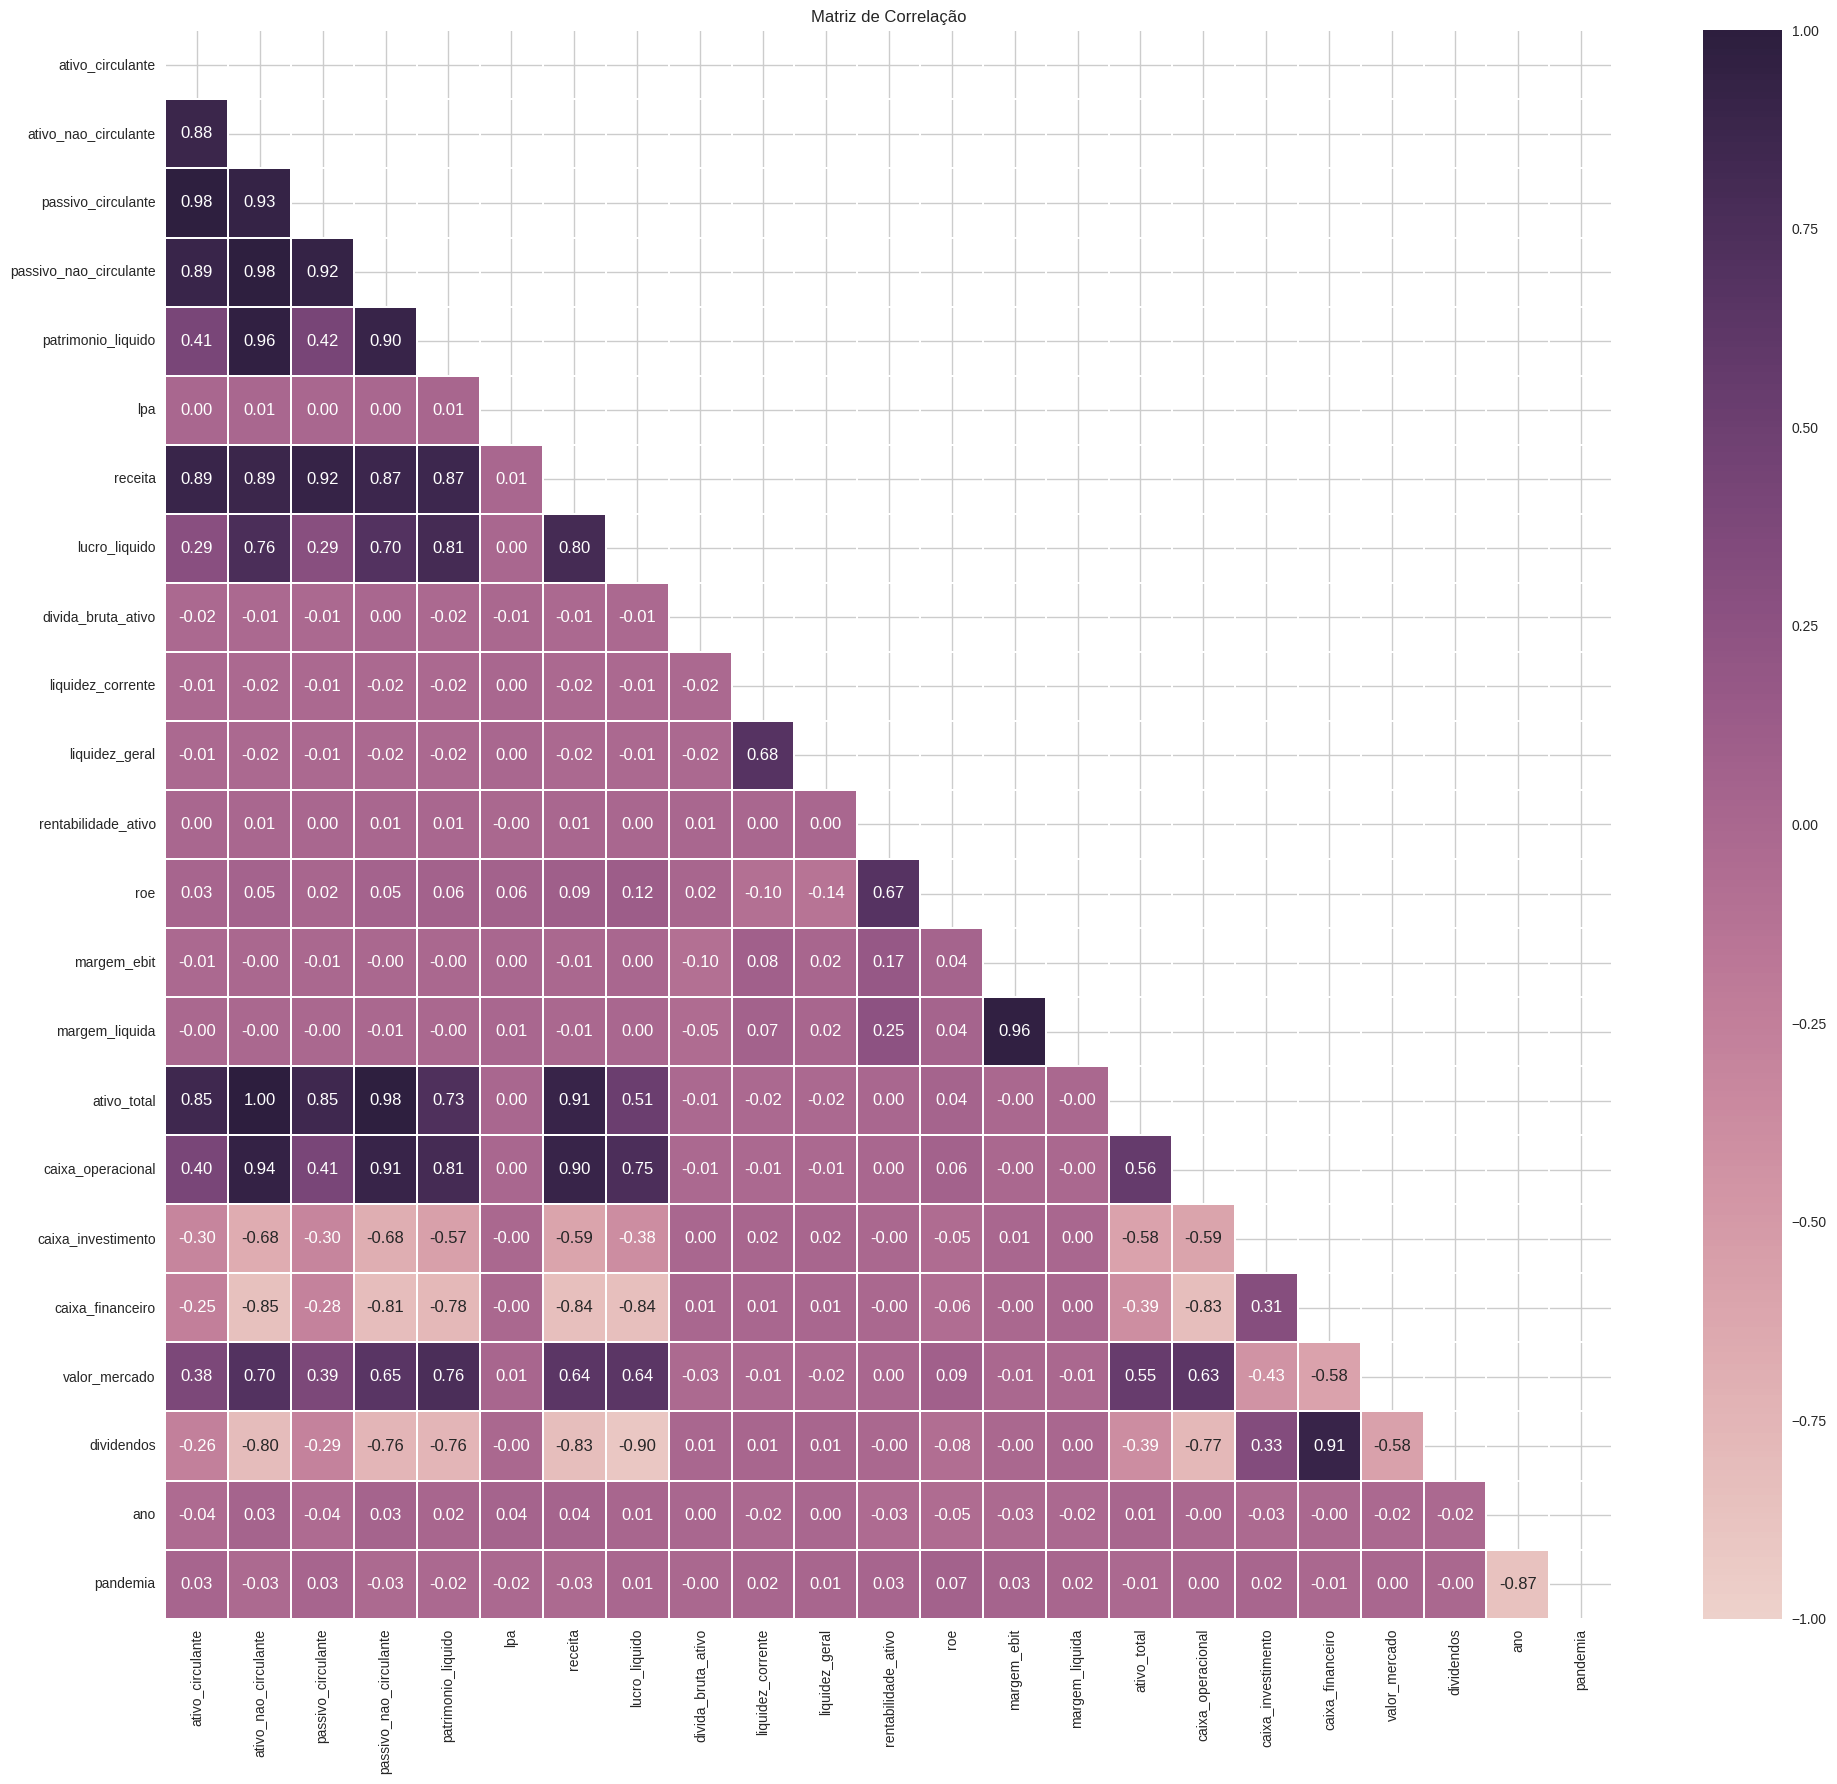

In [290]:
calcular_e_exibir_correlacao(df_economatica_correcao_tipagem)

Visualizando de forma geral, parece estar bem dividido entre fortemente correlacionadas ou não. Vamos considerar uma correlação sendo forte como seu valor acima de 0.85.

As seguintes variáveis estão fortemente correlacionadas:
- caixa_financeiro <- **0.91** -> dividendos
- ano <- **-0.87** -> pandemia
- margem_liquida <- **0.96** -> margem_ebit
- receita <- **-0.83** -> dividendos
- lucro_liquido <- **-0.90** -> dividendos
- caixa_financeiro <- **-0.84** -> receita
- caixa_financeiro <- **-0.84** -> lucro_liquido
- caixa_operacional <- **0.81** -> patrimonio_liquido
- caixa_operacional <- **0.90** -> receita
- ativo_total <- **0.91** -> receita
- lucro_liquido <- **0.81** -> patrimonio_liquido
- lucro_liquido <- **0.80** -> receita
- receita <- **0.87** -> patrimonio_liquido

As seguintes variáveis não são consideradas, porque já estão marcadas para remover:
- ativo_circulante
- ativo_nao_circulante
- passivo_circulante
- passivo_nao_circulante

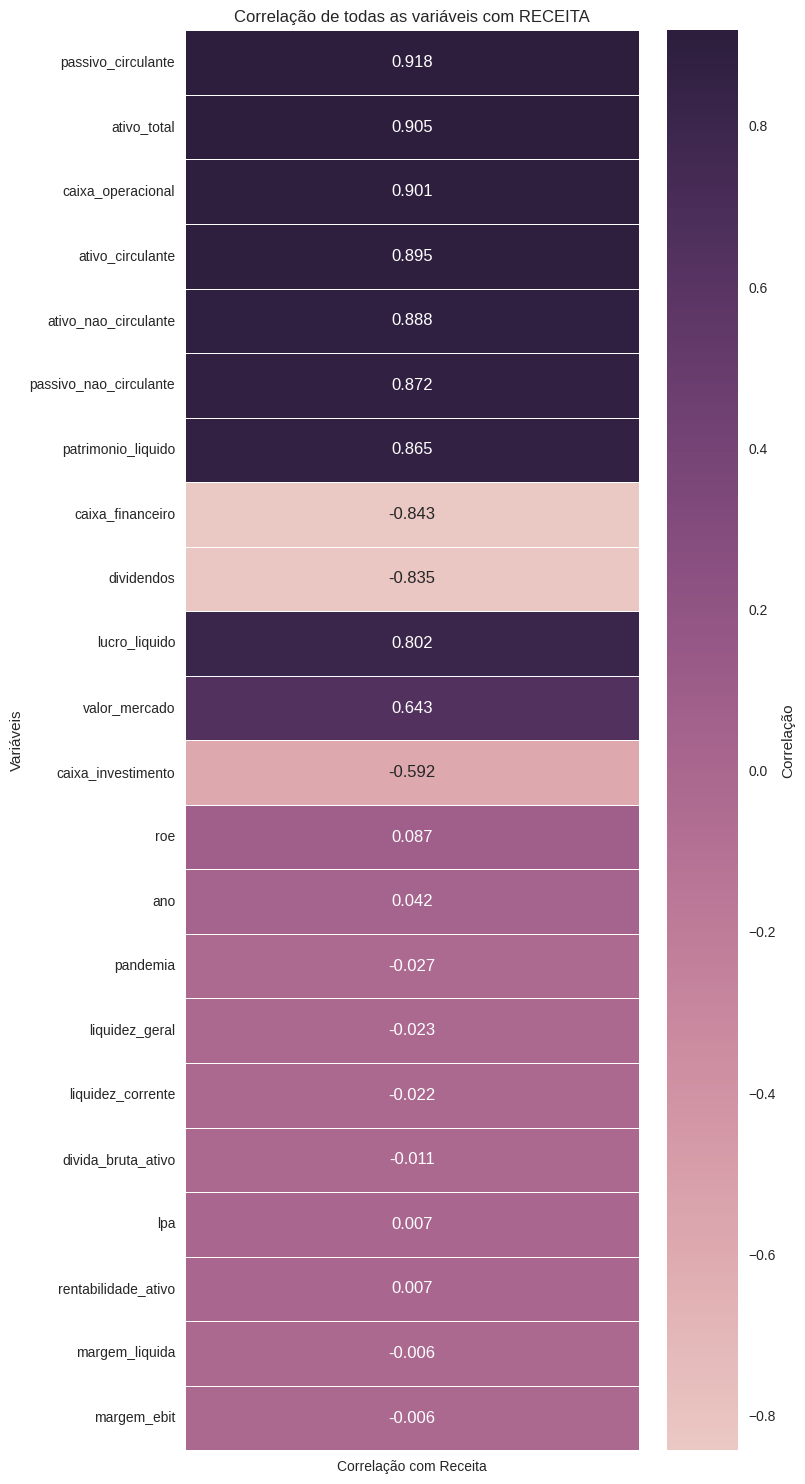

In [291]:
calcular_correlacao_com_receita(df_economatica_correcao_tipagem)

### Colunas derivadas

As colunas derivadas são:

**Endividamento**:
- divida_bruta_ativo_* → já está no dataset

**Liquidez**:
- liquidez_corrente_* = ativo_circulante_* / passivo_circulante_*
- liquidez_geral_* = (ativo_circulante_* + ativo_nao_circulante_*) / (passivo_circulante_* + passivo_nao_circulante_*)

**Rentabilidade**:
- rentabilidade_ativo_* (ROA) = lucro_liquido_* / ((ativo_total_* + ativo_total*_(ano-1)) / 2)
- roe_* = lucro_liquido_* / ((patrimonio_liquido_* + patrimonio_liquido*_(ano-1)) / 2)

**Margens**:
- margem_liquida_* = lucro_liquido_* / receita_*
- margem_ebit_* → já está no dataset (mas não pode ser recalculada, pois falta ebit_*)

**Lucro por Ação**:
- lpa_* → já está no dataset (não dá para recalcular, pois falta numero_acoes_*)

**Valor de Mercado da Empresa**:
- valor_mercado_* → já está no dataset (não dá para recalcular, pois falta preco_acao_31dez_* e numero_acoes_*)


#### Liquidez

In [292]:
def analisar_nulos_coluna_derivada(df, coluna_derivada, colunas_calculo):
    """
    Analisa valores nulos em uma coluna derivada e verifica valores não nulos nas colunas de cálculo.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        coluna_derivada (str): O nome da coluna derivada (ex: 'liquidez_corrente').
        colunas_calculo (list): Uma lista de nomes das colunas usadas para cálculo
                               (ex: ['ativo_circulante', 'passivo_circulante']).
    """
    print(f"Análise de valores nulos para a coluna {coluna_derivada}:")

    # Verifica se a coluna derivada e as colunas de cálculo existem
    if coluna_derivada in df.columns and all(c in df.columns for c in colunas_calculo):
        # Filtra as linhas onde a coluna derivada é nula
        linhas_com_nulos_derivada = df[df[coluna_derivada].isnull()]

        # Constrói a condição para verificar se todas as colunas de cálculo não são nulas nessas linhas
        if not linhas_com_nulos_derivada.empty:
            condicao_nao_nula = linhas_com_nulos_derivada[colunas_calculo[0]].notnull()
            for col_calc in colunas_calculo[1:]:
                condicao_nao_nula = condicao_nao_nula & linhas_com_nulos_derivada[col_calc].notnull()

            # Conta as linhas onde todas as colunas de cálculo não são nulas
            contagem_nao_nula = linhas_com_nulos_derivada[condicao_nao_nula].shape[0]
            
            print(f"Total de linhas com {coluna_derivada} nulo: {len(linhas_com_nulos_derivada)}")
            print(f"Linhas com valores não nulos nas colunas de cálculo: {contagem_nao_nula}")
        else:
            print(f"Nenhuma linha com valor nulo encontrada em {coluna_derivada}")
    else:
        colunas_faltando = [col for col in [coluna_derivada] + colunas_calculo if col not in df.columns]
        print(f"Colunas não encontradas no DataFrame: {colunas_faltando}")

In [293]:
analisar_nulos_coluna_derivada(df_economatica_correcao_tipagem, 'liquidez_corrente', ['ativo_circulante', 'passivo_circulante'])

Análise de valores nulos para a coluna liquidez_corrente:
Total de linhas com liquidez_corrente nulo: 118
Linhas com valores não nulos nas colunas de cálculo: 29


In [294]:
# Aplica a lógica para liquidez_corrente no dataset com ano como feature
# Identifica as linhas onde a coluna derivada é nula e as colunas de cálculo não são nulas
condicao = (df_economatica_correcao_tipagem['liquidez_corrente'].isnull()) & \
           (df_economatica_correcao_tipagem['ativo_circulante'].notnull()) & \
           (df_economatica_correcao_tipagem['passivo_circulante'].notnull()) & \
           (df_economatica_correcao_tipagem['passivo_circulante'] != 0) # Evita divisão por zero

# Calcula o valor derivado
valores_calculados = df_economatica_correcao_tipagem.loc[condicao].apply(
    lambda row: row['ativo_circulante'] / row['passivo_circulante'], axis=1
)

# Aplica a função limpar_e_converter nos valores calculados e preenche os nulos
df_economatica_correcao_tipagem.loc[condicao, 'liquidez_corrente'] = valores_calculados.apply(limpar_e_converter)

print(f"Calculados e preenchidos nulos para 'liquidez_corrente' onde 'ativo_circulante' e 'passivo_circulante' não eram nulos.")

Calculados e preenchidos nulos para 'liquidez_corrente' onde 'ativo_circulante' e 'passivo_circulante' não eram nulos.


In [295]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         108
liquidez_geral            116
rentabilidade_ativo        46
roe                       276
margem_ebit               211
margem_liquida            124
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2291 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 648


Diminuimos em 10, as células nulas e nenhuma linha ainda...

In [297]:
analisar_nulos_coluna_derivada(df_economatica_correcao_tipagem, 'liquidez_geral', ['ativo_circulante', 'ativo_nao_circulante', 'passivo_circulante', 'passivo_nao_circulante'])

Análise de valores nulos para a coluna liquidez_geral:
Total de linhas com liquidez_geral nulo: 116
Linhas com valores não nulos nas colunas de cálculo: 25


In [298]:
condicao = (df_economatica_correcao_tipagem['liquidez_geral'].isnull()) & \
           (df_economatica_correcao_tipagem['ativo_circulante'].notnull()) & \
           (df_economatica_correcao_tipagem['ativo_nao_circulante'].notnull()) & \
           (df_economatica_correcao_tipagem['passivo_circulante'].notnull()) & \
           (df_economatica_correcao_tipagem['passivo_nao_circulante'].notnull())

# Calcula o divisor e evita divisão por zero
divisor = df_economatica_correcao_tipagem.loc[condicao, 'passivo_circulante'] + df_economatica_correcao_tipagem.loc[condicao, 'passivo_nao_circulante']
condicao = condicao & (divisor != 0)

# Calcula o valor derivado
valores_calculados = df_economatica_correcao_tipagem.loc[condicao].apply(
    lambda row: (row['ativo_circulante'] + row['ativo_nao_circulante']) / (row['passivo_circulante'] + row['passivo_nao_circulante']), axis=1
)

# Aplica a função limpar_e_converter nos valores calculados e preenche os nulos
df_economatica_correcao_tipagem.loc[condicao, 'liquidez_geral'] = valores_calculados.apply(limpar_e_converter)

print(f"Calculados e preenchidos nulos para 'liquidez_geral' onde as colunas de cálculo não eram nulas.")

Calculados e preenchidos nulos para 'liquidez_geral' onde as colunas de cálculo não eram nulas.


In [300]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         108
liquidez_geral            106
rentabilidade_ativo        46
roe                       276
margem_ebit               211
margem_liquida            124
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2281 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 648


Diminuimos em mais 10, e nenhuma linha recuperada 100% ainda...

#### Margens

In [302]:
analisar_nulos_coluna_derivada(df_economatica_correcao_tipagem, 'margem_liquida', ['lucro_liquido', 'receita'])

Análise de valores nulos para a coluna margem_liquida:
Total de linhas com margem_liquida nulo: 124
Linhas com valores não nulos nas colunas de cálculo: 73


In [303]:
# Aplica a lógica para margem_liquida no dataset com ano como feature
# Identifica as linhas onde a coluna derivada é nula e as colunas de cálculo não são nulas
condicao = (df_economatica_correcao_tipagem['margem_liquida'].isnull()) & \
           (df_economatica_correcao_tipagem['lucro_liquido'].notnull()) & \
           (df_economatica_correcao_tipagem['receita'].notnull()) & \
           (df_economatica_correcao_tipagem['receita'] != 0) # Evita divisão por zero

# Calcula o valor derivado
valores_calculados = df_economatica_correcao_tipagem.loc[condicao].apply(
    lambda row: row['lucro_liquido'] / row['receita'], axis=1
)

# Aplica a função limpar_e_converter nos valores calculados e preenche os nulos
df_economatica_correcao_tipagem.loc[condicao, 'margem_liquida'] = valores_calculados.apply(limpar_e_converter)

print(f"Calculados e preenchidos nulos para 'margem_liquida' onde 'lucro_liquido' e 'receita' não eram nulos.")

Calculados e preenchidos nulos para 'margem_liquida' onde 'lucro_liquido' e 'receita' não eram nulos.


In [305]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         108
liquidez_geral            106
rentabilidade_ativo        46
roe                       276
margem_ebit               211
margem_liquida            123
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2280 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 648


Eliminamos incríveis 1 resultados.

#### Rentabilidade

In [306]:
analisar_nulos_coluna_derivada(df_economatica_correcao_tipagem, 'rentabilidade_ativo', ['lucro_liquido', 'ativo_total'])

Análise de valores nulos para a coluna rentabilidade_ativo:
Total de linhas com rentabilidade_ativo nulo: 46
Linhas com valores não nulos nas colunas de cálculo: 1


In [313]:
# Aplica a lógica para rentabilidade_ativo no dataset com ano como feature
# Para calcular ROA, precisamos do ativo total do ano anterior, então criamos um DataFrame auxiliar
df_economatica_sorted = df_economatica_correcao_tipagem.sort_values(['codigo', 'ano']).copy()
df_economatica_sorted['ativo_total_anterior'] = df_economatica_sorted.groupby('codigo')['ativo_total'].shift(1)

# Identifica as linhas onde a coluna derivada é nula e as colunas de cálculo não são nulas
condicao = (df_economatica_sorted['rentabilidade_ativo'].isnull()) & \
           (df_economatica_sorted['lucro_liquido'].notnull()) & \
           (df_economatica_sorted['ativo_total'].notnull()) & \
           (df_economatica_sorted['ativo_total_anterior'].notnull()) & \
           (df_economatica_sorted['ano'] > 2020)  # Só calcula a partir de 2021

# Calcula o denominador (média do ativo total atual e anterior) e evita divisão por zero
denominador = (df_economatica_sorted.loc[condicao, 'ativo_total'] + df_economatica_sorted.loc[condicao, 'ativo_total_anterior']) / 2
condicao = condicao & (denominador != 0)

# Calcula o valor derivado
valores_calculados = df_economatica_sorted.loc[condicao].apply(
    lambda row: row['lucro_liquido'] / ((row['ativo_total'] + row['ativo_total_anterior']) / 2), axis=1
)

# Aplica a função limpar_e_converter nos valores calculados e preenche os nulos
df_economatica_sorted.loc[condicao, 'rentabilidade_ativo'] = valores_calculados.apply(limpar_e_converter)

# Atualiza o DataFrame original
df_economatica_correcao_tipagem = df_economatica_sorted.drop(columns=['ativo_total_anterior']).copy()

print(f"Calculados e preenchidos nulos para 'rentabilidade_ativo' onde as colunas de cálculo não eram nulas.")

Calculados e preenchidos nulos para 'rentabilidade_ativo' onde as colunas de cálculo não eram nulas.


In [314]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         108
liquidez_geral            106
rentabilidade_ativo        46
roe                       276
margem_ebit               211
margem_liquida            123
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2280 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 648


In [310]:
analisar_nulos_coluna_derivada(df_economatica_correcao_tipagem, 'roe', ['lucro_liquido', 'patrimonio_liquido'])

Análise de valores nulos para a coluna roe:
Total de linhas com roe nulo: 276
Linhas com valores não nulos nas colunas de cálculo: 231


In [315]:
# Aplica a lógica para roe no dataset com ano como feature
# Para calcular ROE, precisamos do patrimônio líquido do ano anterior
df_economatica_sorted = df_economatica_correcao_tipagem.sort_values(['codigo', 'ano']).copy()
df_economatica_sorted['patrimonio_liquido_anterior'] = df_economatica_sorted.groupby('codigo')['patrimonio_liquido'].shift(1)

# Identifica as linhas onde a coluna derivada é nula e as colunas de cálculo não são nulas
condicao = (df_economatica_sorted['roe'].isnull()) & \
           (df_economatica_sorted['lucro_liquido'].notnull()) & \
           (df_economatica_sorted['patrimonio_liquido'].notnull()) & \
           (df_economatica_sorted['patrimonio_liquido_anterior'].notnull()) & \
           (df_economatica_sorted['ano'] > 2020)  # Só calcula a partir de 2021

# Calcula o denominador (média do patrimônio líquido atual e anterior) e evita divisão por zero
denominador = (df_economatica_sorted.loc[condicao, 'patrimonio_liquido'] + df_economatica_sorted.loc[condicao, 'patrimonio_liquido_anterior']) / 2
condicao = condicao & (denominador != 0)

# Calcula o valor derivado
valores_calculados = df_economatica_sorted.loc[condicao].apply(
    lambda row: row['lucro_liquido'] / ((row['patrimonio_liquido'] + row['patrimonio_liquido_anterior']) / 2), axis=1
)

# Aplica a função limpar_e_converter nos valores calculados e preenche os nulos
df_economatica_sorted.loc[condicao, 'roe'] = valores_calculados.apply(limpar_e_converter)

# Atualiza o DataFrame original
df_economatica_correcao_tipagem = df_economatica_sorted.drop(columns=['patrimonio_liquido_anterior']).copy()

print(f"Calculados e preenchidos nulos para 'roe' onde as colunas de cálculo não eram nulas.")

Calculados e preenchidos nulos para 'roe' onde as colunas de cálculo não eram nulas.


In [317]:
contar_e_exibir_nulos(df_economatica_correcao_tipagem)

Contagem de valores nulos por coluna (apenas colunas com nulos):
ativo_circulante           89
ativo_nao_circulante      128
passivo_circulante         84
passivo_nao_circulante    128
patrimonio_liquido         44
lpa                        45
receita                   138
lucro_liquido              44
divida_bruta_ativo        138
liquidez_corrente         108
liquidez_geral            106
rentabilidade_ativo        46
roe                       107
margem_ebit               211
margem_liquida            123
ativo_total                44
caixa_operacional          47
caixa_investimento         47
caixa_financeiro           47
valor_mercado             290
dividendos                 97
dtype: int64

2111 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 509


Aqui já obtivemos resultados significativos, de 648 linhas com valores nulos, fomos para 509.

#### Remover colunas de ativo/passivo 

In [329]:
df_economatica_correcao_tipagem.drop(columns=['ativo_circulante', 'ativo_nao_circulante', 'passivo_circulante', 'passivo_nao_circulante'], inplace=True)

### Preenchimento com base em média

In [330]:
def identificar_features_com_nulo_unico_ano(df):
    """
    Identifica features onde há ações que possuem valores nulos em apenas um dos cinco anos (2020-2024).
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        
    Returns:
        dict: Dicionário com features como chave e lista de códigos de ações que atendem o critério
    """
    # Colunas que são features numéricas (excluindo identificadores e categóricas)
    features_numericas = [col for col in df.columns if col not in ['nome', 'codigo', 'setor', 'ano', 'pandemia']]
    
    resultado = {}
    
    for feature in features_numericas:
        acoes_com_nulo_unico = []
        
        # Agrupa por código da ação
        for codigo, grupo in df.groupby('codigo'):
            # Verifica se há exatamente 5 anos de dados (2020-2024)
            if len(grupo) == 5:
                # Conta quantos valores nulos existem para essa feature
                nulos_count = grupo[feature].isnull().sum()
                
                # Se há exatamente 1 valor nulo (nulo em apenas um ano)
                if nulos_count == 1:
                    acoes_com_nulo_unico.append(codigo)
        
        # Se há ações que atendem o critério, adiciona ao resultado
        if acoes_com_nulo_unico:
            resultado[feature] = acoes_com_nulo_unico
    
    return resultado

In [331]:
def exibir_relatorio_nulos_unicos(df):
    """
    Exibe um relatório detalhado das features com nulos únicos.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
    """
    resultado = identificar_features_com_nulo_unico_ano(df)
    
    if not resultado:
        print("Nenhuma feature possui ações com nulo em apenas um ano.")
        return
    
    print("=== RELATÓRIO: Features com nulos em apenas um ano ===\n")
    
    # Lista apenas os nomes das features
    features_com_nulo_unico = list(resultado.keys())
    print(f"Total de features identificadas: {len(features_com_nulo_unico)}")
    print(f"Features: {features_com_nulo_unico}\n")
    
    # Relatório detalhado por feature
    for feature, acoes in resultado.items():
        print(f"Feature: '{feature}'")
        print(f"  - Quantidade de ações afetadas: {len(acoes)}")
        print(f"  - Códigos das ações: {acoes[:10]}{'...' if len(acoes) > 10 else ''}")
        
        # Mostra em qual ano está o nulo para as primeiras 3 ações
        print("  - Detalhes dos primeiros casos:")
        for i, codigo in enumerate(acoes[:3]):
            dados_acao = df[df['codigo'] == codigo][['ano', feature]]
            ano_nulo = dados_acao[dados_acao[feature].isnull()]['ano'].iloc[0]
            print(f"    * {codigo}: nulo no ano {ano_nulo}")
        print()
    
    return features_com_nulo_unico

In [332]:
features_nulo_unico = exibir_relatorio_nulos_unicos(df_economatica_correcao_tipagem)

=== RELATÓRIO: Features com nulos em apenas um ano ===

Total de features identificadas: 17
Features: ['patrimonio_liquido', 'lpa', 'receita', 'lucro_liquido', 'divida_bruta_ativo', 'liquidez_corrente', 'liquidez_geral', 'rentabilidade_ativo', 'roe', 'margem_ebit', 'margem_liquida', 'ativo_total', 'caixa_operacional', 'caixa_investimento', 'caixa_financeiro', 'valor_mercado', 'dividendos']

Feature: 'patrimonio_liquido'
  - Quantidade de ações afetadas: 17
  - Códigos das ações: ['AGXY3', 'AURE3', 'BBML3', 'BOBR3', 'BSLI3', 'CTNM3', 'CTSA3', 'FIEI3', 'FIGE3', 'GEPA3']...
  - Detalhes dos primeiros casos:
    * AGXY3: nulo no ano 2024
    * AURE3: nulo no ano 2020
    * BBML3: nulo no ano 2024

Feature: 'lpa'
  - Quantidade de ações afetadas: 17
  - Códigos das ações: ['AGXY3', 'AURE3', 'BBML3', 'BOBR3', 'BSLI3', 'CTNM3', 'CTSA3', 'FIEI3', 'FIGE3', 'JALL3']...
  - Detalhes dos primeiros casos:
    * AGXY3: nulo no ano 2024
    * AURE3: nulo no ano 2020
    * BBML3: nulo no ano 2024

Fea

In [333]:
def preencher_nulos_com_media_temporal(df):
    """
    Preenche valores nulos com a média dos outros anos para ações que possuem 
    exatamente 1 valor nulo em uma feature (4 valores válidos e 1 nulo).
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        
    Returns:
        pd.DataFrame: DataFrame com os valores nulos preenchidos
        dict: Relatório das alterações realizadas
    """
    df_resultado = df.copy()
    relatorio = {
        'features_processadas': [],
        'total_valores_preenchidos': 0,
        'detalhes_por_feature': {}
    }
    
    # Identifica features com nulos únicos
    features_com_nulo_unico = identificar_features_com_nulo_unico_ano(df)
    
    if not features_com_nulo_unico:
        print("Nenhuma feature encontrada com o critério de 1 nulo em 5 anos.")
        return df_resultado, relatorio
    
    print("=== PREENCHIMENTO COM MÉDIA TEMPORAL ===\n")
    
    for feature, acoes_afetadas in features_com_nulo_unico.items():
        valores_preenchidos = 0
        detalhes_acoes = []
        
        print(f"Processando feature: '{feature}'")
        print(f"  - Ações afetadas: {len(acoes_afetadas)}")
        
        for codigo in acoes_afetadas:
            # Obtém os dados da ação para todos os anos
            dados_acao = df_resultado[df_resultado['codigo'] == codigo].copy()
            
            if len(dados_acao) == 5:  # Confirma que tem 5 anos de dados
                valores_feature = dados_acao[feature]
                
                # Verifica se há exatamente 1 nulo
                if valores_feature.isnull().sum() == 1:
                    # Calcula a média dos valores não nulos
                    valores_nao_nulos = valores_feature.dropna()
                    
                    if len(valores_nao_nulos) == 4:  # Confirma que tem 4 valores válidos
                        media = valores_nao_nulos.mean()
                        
                        # Identifica o índice onde está o nulo
                        indice_nulo = dados_acao[valores_feature.isnull()].index[0]
                        ano_nulo = dados_acao.loc[indice_nulo, 'ano']
                        
                        # Aplica a função limpar_e_converter para garantir formatação
                        media_formatada = limpar_e_converter(media)
                        
                        # Preenche o valor nulo com a média
                        df_resultado.loc[indice_nulo, feature] = media_formatada
                        
                        valores_preenchidos += 1
                        detalhes_acoes.append({
                            'codigo': codigo,
                            'ano_nulo': ano_nulo,
                            'media_calculada': media_formatada,
                            'valores_originais': valores_nao_nulos.tolist()
                        })
        
        # Atualiza o relatório
        relatorio['features_processadas'].append(feature)
        relatorio['total_valores_preenchidos'] += valores_preenchidos
        relatorio['detalhes_por_feature'][feature] = {
            'valores_preenchidos': valores_preenchidos,
            'acoes_processadas': detalhes_acoes[:5]  # Mostra apenas os primeiros 5 exemplos
        }
        
        print(f"  - Valores preenchidos: {valores_preenchidos}")
        
        # Mostra alguns exemplos
        if detalhes_acoes:
            print("  - Exemplos:")
            for exemplo in detalhes_acoes[:3]:
                print(f"    * {exemplo['codigo']} (ano {exemplo['ano_nulo']}): "
                      f"média = {exemplo['media_calculada']}")
        print()
    
    print(f"=== RESUMO ===")
    print(f"Features processadas: {len(relatorio['features_processadas'])}")
    print(f"Total de valores preenchidos: {relatorio['total_valores_preenchidos']}")
    
    return df_resultado, relatorio

In [334]:
def exibir_relatorio_preenchimento(relatorio):
    """
    Exibe um relatório detalhado do preenchimento realizado.
    
    Args:
        relatorio (dict): Relatório retornado pela função de preenchimento
    """
    print("=== RELATÓRIO DETALHADO DE PREENCHIMENTO ===\n")
    
    if not relatorio['features_processadas']:
        print("Nenhum preenchimento foi realizado.")
        return
    
    for feature in relatorio['features_processadas']:
        detalhes = relatorio['detalhes_por_feature'][feature]
        print(f"Feature: '{feature}'")
        print(f"  - Valores preenchidos: {detalhes['valores_preenchidos']}")
        
        if detalhes['acoes_processadas']:
            print("  - Detalhes das ações processadas:")
            for acao in detalhes['acoes_processadas']:
                print(f"    * {acao['codigo']} (ano {acao['ano_nulo']}): "
                      f"média = {acao['media_calculada']}")
                print(f"      Valores originais: {acao['valores_originais']}")
        print()

In [335]:
print("Antes do preenchimento:")
contar_e_exibir_nulos(df_economatica_correcao_tipagem)
print("\n" + "="*50 + "\n")

df_economatica_preenchido, relatorio_preenchimento = preencher_nulos_com_media_temporal(df_economatica_correcao_tipagem)

print("\n" + "="*50 + "\n")
print("Após o preenchimento:")
contar_e_exibir_nulos(df_economatica_preenchido)

Antes do preenchimento:
Contagem de valores nulos por coluna (apenas colunas com nulos):
patrimonio_liquido      44
lpa                     45
receita                138
lucro_liquido           44
divida_bruta_ativo     138
liquidez_corrente      108
liquidez_geral         106
rentabilidade_ativo     46
roe                    107
margem_ebit            211
margem_liquida         123
ativo_total             44
caixa_operacional       47
caixa_investimento      47
caixa_financeiro        47
valor_mercado          290
dividendos              97
dtype: int64

1682 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 509


=== PREENCHIMENTO COM MÉDIA TEMPORAL ===

Processando feature: 'patrimonio_liquido'
  - Ações afetadas: 17
  - Valores preenchidos: 17
  - Exemplos:
    * AGXY3 (ano 2024): média = 1268207.0
    * AURE3 (ano 2020): média = 11320282.5
    * BBML3 (ano 2024): média = 86.83

Processando feature: 'lpa'
  - Ações afetadas: 17
  - Valores preen

### Remoção dos nulos restantes

In [336]:
def identificar_codigos_com_nulos(df):
    """
    Identifica as linhas que possuem valores nulos e retorna a lista de códigos únicos.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        
    Returns:
        dict: Dicionário com informações detalhadas sobre códigos com nulos
    """
    # Identifica linhas que possuem pelo menos um valor nulo
    linhas_com_nulos = df.isnull().any(axis=1)
    
    # Filtra o DataFrame para apenas linhas com nulos
    df_com_nulos = df[linhas_com_nulos].copy()
    
    # Lista de códigos únicos que possuem linhas com nulos
    codigos_com_nulos = df_com_nulos['codigo'].unique().tolist()
    
    # Contagem de linhas com nulos por código
    contagem_por_codigo = df_com_nulos['codigo'].value_counts().to_dict()
    
    # Análise detalhada por código
    detalhes_por_codigo = {}
    for codigo in codigos_com_nulos:
        dados_codigo = df[df['codigo'] == codigo]
        linhas_nulas_codigo = dados_codigo.isnull().any(axis=1).sum()
        total_linhas_codigo = len(dados_codigo)
        anos_com_nulos = dados_codigo[dados_codigo.isnull().any(axis=1)]['ano'].tolist()
        
        detalhes_por_codigo[codigo] = {
            'total_linhas': total_linhas_codigo,
            'linhas_com_nulos': linhas_nulas_codigo,
            'anos_com_nulos': anos_com_nulos,
            'percentual_nulos': round((linhas_nulas_codigo / total_linhas_codigo) * 100, 2)
        }
    
    # Resumo geral
    resumo = {
        'total_linhas_dataset': len(df),
        'total_linhas_com_nulos': len(df_com_nulos),
        'total_codigos_unicos': df['codigo'].nunique(),
        'total_codigos_com_nulos': len(codigos_com_nulos),
        'percentual_codigos_afetados': round((len(codigos_com_nulos) / df['codigo'].nunique()) * 100, 2)
    }
    
    return {
        'codigos_com_nulos': codigos_com_nulos,
        'contagem_por_codigo': contagem_por_codigo,
        'detalhes_por_codigo': detalhes_por_codigo,
        'resumo': resumo
    }

In [337]:
def exibir_relatorio_codigos_nulos(df):
    """
    Exibe um relatório completo dos códigos que possuem linhas com valores nulos.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
    """
    resultado = identificar_codigos_com_nulos(df)
    
    print("=== RELATÓRIO: Códigos com Valores Nulos ===\n")
    
    # Resumo geral
    resumo = resultado['resumo']
    print(f"📊 RESUMO GERAL:")
    print(f"  - Total de linhas no dataset: {resumo['total_linhas_dataset']:,}")
    print(f"  - Linhas com pelo menos um nulo: {resumo['total_linhas_com_nulos']:,}")
    print(f"  - Total de códigos únicos: {resumo['total_codigos_unicos']:,}")
    print(f"  - Códigos com nulos: {resumo['total_codigos_com_nulos']:,}")
    print(f"  - Percentual de códigos afetados: {resumo['percentual_codigos_afetados']}%")
    print()
    
    # Lista dos códigos
    codigos = resultado['codigos_com_nulos']
    print(f"📋 LISTA DE CÓDIGOS COM NULOS ({len(codigos)} códigos):")
    
    # Mostra em grupos de 10 para melhor visualização
    for i in range(0, len(codigos), 10):
        grupo = codigos[i:i+10]
        print(f"  {grupo}")
    print()
    
    # Top 10 códigos com mais linhas nulas
    contagem = resultado['contagem_por_codigo']
    top_10_nulos = sorted(contagem.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"🔝 TOP 10 CÓDIGOS COM MAIS LINHAS NULAS:")
    for codigo, qtd_linhas in top_10_nulos:
        detalhes = resultado['detalhes_por_codigo'][codigo]
        print(f"  - {codigo}: {qtd_linhas}/{detalhes['total_linhas']} linhas "
              f"({detalhes['percentual_nulos']}%) - Anos: {detalhes['anos_com_nulos']}")
    print()
    
    return resultado

In [338]:
def obter_lista_codigos_com_nulos(df):
    """
    Retorna apenas a lista simples de códigos únicos que possuem valores nulos.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        
    Returns:
        list: Lista de códigos únicos com valores nulos
    """
    resultado = identificar_codigos_com_nulos(df)
    return resultado['codigos_com_nulos']

In [339]:
def analisar_padroes_nulos_por_codigo(df, codigo_especifico=None):
    """
    Analisa padrões detalhados de nulos para um código específico ou todos os códigos.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        codigo_especifico (str, optional): Código específico para análise detalhada
        
    Returns:
        dict: Análise detalhada dos padrões de nulos
    """
    if codigo_especifico:
        # Análise para um código específico
        dados_codigo = df[df['codigo'] == codigo_especifico].copy()
        if dados_codigo.empty:
            return f"Código '{codigo_especifico}' não encontrado no dataset."
        
        print(f"=== ANÁLISE DETALHADA: {codigo_especifico} ===\n")
        
        # Para cada ano, mostra quais colunas têm nulos
        for _, linha in dados_codigo.iterrows():
            ano = linha['ano']
            colunas_nulas = linha.isnull()
            colunas_com_nulos = colunas_nulas[colunas_nulas].index.tolist()
            
            print(f"📅 Ano {ano}:")
            if colunas_com_nulos:
                # Remove colunas de identificação da lista
                colunas_features_nulas = [col for col in colunas_com_nulos 
                                        if col not in ['nome', 'codigo', 'setor']]
                print(f"  - Colunas com nulos: {colunas_features_nulas}")
                print(f"  - Total de nulos: {len(colunas_features_nulas)}")
            else:
                print("  - Sem valores nulos")
            print()
    else:
        # Análise geral de padrões
        resultado = identificar_codigos_com_nulos(df)
        return resultado

In [340]:
print("=== IDENTIFICAÇÃO DE CÓDIGOS COM VALORES NULOS ===\n")
relatorio_nulos = exibir_relatorio_codigos_nulos(df_economatica_preenchido)

=== IDENTIFICAÇÃO DE CÓDIGOS COM VALORES NULOS ===

=== RELATÓRIO: Códigos com Valores Nulos ===

📊 RESUMO GERAL:
  - Total de linhas no dataset: 1,770
  - Linhas com pelo menos um nulo: 430
  - Total de códigos únicos: 354
  - Códigos com nulos: 96
  - Percentual de códigos afetados: 27.12%

📋 LISTA DE CÓDIGOS COM NULOS (96 códigos):
  ['ADMF3', 'AESO3', 'ALPK3', 'AMOB3', 'APTI3', 'ATED3', 'AURE3', 'AZTE3', 'BAZA3', 'BBAS3']
  ['BBDC3', 'BBML3', 'BBSE3', 'BEES3', 'BETP3', 'BGIP3', 'BMEB3', 'BMIN3', 'BNBR3', 'BOBR3']
  ['BPAC3', 'BPAR3', 'BRAP3', 'BRQB3', 'BRSR3', 'BRST3', 'BSLI3', 'CASN3', 'CATA3', 'CEGR3']
  ['COGN3', 'CRTE3', 'CSUD3', 'CXSE3', 'DIRR3', 'EGGY3', 'FIGE3', 'FRRN3B', 'GFSA3', 'GGPS3']
  ['GPAR3', 'GRAO3', 'HAGA3', 'HBSA3', 'HYPE3', 'INNC3', 'INTB3', 'IRBR3', 'ITUB3', 'IVPR3B']
  ['JSLG3', 'LAVV3', 'LIGT3', 'LIPR3', 'LLBI3', 'LTEL3B', 'LTLA3B', 'MAPT3', 'MATD3', 'MEAL3']
  ['MELK3', 'MERC3', 'MILS3', 'MMAQ3', 'MNZC3', 'MOAR3', 'MSPA3', 'NEMO3', 'NORD3', 'NRTQ3']
  ['NUTR

In [341]:
def remover_acoes_com_nulos(df):
    """
    Remove TODAS as ações que possuem pelo menos 1 valor nulo em qualquer ano/feature.
    
    Args:
        df (pd.DataFrame): DataFrame com dados organizados por ano
        
    Returns:
        pd.DataFrame: DataFrame apenas com ações que não possuem nenhum valor nulo
        dict: Relatório das remoções realizadas
    """
    print("=== REMOÇÃO DE AÇÕES COM VALORES NULOS ===\n")
    
    # Estado inicial
    total_linhas_inicial = len(df)
    total_codigos_inicial = df['codigo'].nunique()
    
    print(f"📊 ESTADO INICIAL:")
    print(f"  - Total de linhas: {total_linhas_inicial:,}")
    print(f"  - Total de códigos únicos: {total_codigos_inicial:,}")
    print()
    
    # Identifica códigos com nulos
    resultado_nulos = identificar_codigos_com_nulos(df)
    codigos_com_nulos = resultado_nulos['codigos_com_nulos']
    
    print(f"🔍 ANÁLISE DE NULOS:")
    print(f"  - Códigos com pelo menos 1 nulo: {len(codigos_com_nulos):,}")
    print(f"  - Códigos sem nulos: {total_codigos_inicial - len(codigos_com_nulos):,}")
    print()
    
    # Remove todas as linhas dos códigos que possuem nulos
    df_limpo = df[~df['codigo'].isin(codigos_com_nulos)].copy()
    
    # Estado final
    total_linhas_final = len(df_limpo)
    total_codigos_final = df_limpo['codigo'].nunique()
    
    linhas_removidas = total_linhas_inicial - total_linhas_final
    codigos_removidos = total_codigos_inicial - total_codigos_final
    
    print(f"🗑️ REMOÇÕES REALIZADAS:")
    print(f"  - Linhas removidas: {linhas_removidas:,}")
    print(f"  - Códigos removidos: {codigos_removidos:,}")
    print()
    
    print(f"✅ ESTADO FINAL:")
    print(f"  - Total de linhas: {total_linhas_final:,}")
    print(f"  - Total de códigos únicos: {total_codigos_final:,}")
    print(f"  - Percentual de linhas mantidas: {(total_linhas_final/total_linhas_inicial)*100:.1f}%")
    print(f"  - Percentual de códigos mantidos: {(total_codigos_final/total_codigos_inicial)*100:.1f}%")
    print()
    
    # Verifica se ainda há nulos (deve ser 0)
    nulos_restantes = df_limpo.isnull().sum().sum()
    print(f"🔍 VERIFICAÇÃO FINAL:")
    print(f"  - Valores nulos restantes: {nulos_restantes}")
    
    if nulos_restantes == 0:
        print("  ✅ Sucesso! Nenhum valor nulo encontrado no dataset final.")
    else:
        print("  ⚠️ Atenção! Ainda há valores nulos no dataset.")
    
    # Relatório detalhado
    relatorio = {
        'estado_inicial': {
            'total_linhas': total_linhas_inicial,
            'total_codigos': total_codigos_inicial
        },
        'estado_final': {
            'total_linhas': total_linhas_final,
            'total_codigos': total_codigos_final
        },
        'remocoes': {
            'linhas_removidas': linhas_removidas,
            'codigos_removidos': codigos_removidos,
            'codigos_com_nulos': codigos_com_nulos
        },
        'percentuais': {
            'linhas_mantidas': round((total_linhas_final/total_linhas_inicial)*100, 2),
            'codigos_mantidos': round((total_codigos_final/total_codigos_inicial)*100, 2)
        },
        'verificacao': {
            'nulos_restantes': nulos_restantes,
            'dataset_limpo': nulos_restantes == 0
        }
    }
    
    return df_limpo, relatorio

In [342]:
def exibir_estatisticas_pos_remocao(df_limpo, relatorio):
    """
    Exibe estatísticas detalhadas após a remoção das ações com nulos.
    
    Args:
        df_limpo (pd.DataFrame): DataFrame após remoção
        relatorio (dict): Relatório da remoção
    """
    print("\n" + "="*60)
    print("📈 ESTATÍSTICAS DETALHADAS PÓS-REMOÇÃO")
    print("="*60)
    
    # Distribuição por ano
    print("\n📅 DISTRIBUIÇÃO POR ANO:")
    distribuicao_ano = df_limpo['ano'].value_counts().sort_index()
    for ano, count in distribuicao_ano.items():
        print(f"  - {ano}: {count:,} registros")
    
    # Verifica se todos os códigos têm 5 anos de dados
    contagem_por_codigo = df_limpo['codigo'].value_counts()
    codigos_completos = (contagem_por_codigo == 5).sum()
    codigos_incompletos = (contagem_por_codigo != 5).sum()
    
    print(f"\n🔍 INTEGRIDADE DOS DADOS:")
    print(f"  - Códigos com 5 anos completos: {codigos_completos:,}")
    print(f"  - Códigos com dados incompletos: {codigos_incompletos:,}")
    
    if codigos_incompletos > 0:
        print(f"  ⚠️ Atenção: {codigos_incompletos} códigos não têm 5 anos de dados!")
        incompletos = contagem_por_codigo[contagem_por_codigo != 5]
        print(f"  - Detalhes: {incompletos.to_dict()}")
    
    # Estatísticas de colunas
    print(f"\n📊 ESTATÍSTICAS DO DATASET:")
    print(f"  - Número de colunas: {df_limpo.shape[1]}")
    print(f"  - Colunas numéricas: {len(df_limpo.select_dtypes(include=[np.number]).columns)}")
    print(f"  - Densidade dos dados: 100% (sem nulos)")
    
    # Lista algumas ações que permaneceram
    print(f"\n✅ EXEMPLOS DE AÇÕES MANTIDAS:")
    acoes_exemplo = df_limpo['codigo'].unique()[:10]
    print(f"  - Primeiras 10: {list(acoes_exemplo)}")
    
    return distribuicao_ano, contagem_por_codigo

In [344]:
print("ANTES DA REMOÇÃO:")
contar_e_exibir_nulos(df_economatica_preenchido)
print("\n" + "="*60 + "\n")

df_economatica_sem_nulos, relatorio_remocao = remover_acoes_com_nulos(df_economatica_preenchido)

# Exibe estatísticas detalhadas
estatisticas = exibir_estatisticas_pos_remocao(df_economatica_sem_nulos, relatorio_remocao)

print("\n" + "="*60)
print("🎯 VERIFICAÇÃO FINAL DE NULOS:")
contar_e_exibir_nulos(df_economatica_sem_nulos)

ANTES DA REMOÇÃO:
Contagem de valores nulos por coluna (apenas colunas com nulos):
patrimonio_liquido      27
lpa                     28
receita                123
lucro_liquido           28
divida_bruta_ativo     122
liquidez_corrente       89
liquidez_geral          88
rentabilidade_ativo     28
roe                     50
margem_ebit            193
margem_liquida         105
ativo_total             27
caixa_operacional       30
caixa_investimento      30
caixa_financeiro        30
valor_mercado          251
dividendos              80
dtype: int64

1329 células possuem valores nulos no total.
Número de linhas com pelo menos um valor nulo: 430


=== REMOÇÃO DE AÇÕES COM VALORES NULOS ===

📊 ESTADO INICIAL:
  - Total de linhas: 1,770
  - Total de códigos únicos: 354

🔍 ANÁLISE DE NULOS:
  - Códigos com pelo menos 1 nulo: 96
  - Códigos sem nulos: 258

🗑️ REMOÇÕES REALIZADAS:
  - Linhas removidas: 480
  - Códigos removidos: 96

✅ ESTADO FINAL:
  - Total de linhas: 1,290
  - Total de códi

# Pré-processamento dos dados

## One-Hot Encoding

Nessa etapa iremos fazer o One Hot Encoding para melhor categorização dos setores.

### Criar o OHE

Aqui é configurado um pipeline para realizar o One-Hot Encoding na coluna 'setor' do DataFrame.

In [ ]:
def criar_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype=np.uint8)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False, dtype=np.uint8)

ohe_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="__NA__")),
    ("ohe", criar_ohe()),
])

ct = ColumnTransformer(
    transformers=[("naics", ohe_pipeline, ['setor'])],
    remainder="drop"
)

### Normalização dos nomes das colunas

Criado funções para resolver problemas de duplicação de colunas e padronização nos nomes das colunas, serão utilizadas em breve.

In [ ]:
def deduplicar(nomes):
    """
    Garante que uma lista de nomes seja única, adicionando sufixos numéricos se necessário.

    Args:
        nomes (list): Uma lista de strings (nomes).

    Returns:
        list: Uma lista de nomes únicos com o prefixo 'setor_'.
    """
    visto = {}
    saida = []
    for n in nomes:
        base = f"setor_{n}"
        if base not in visto:
            visto[base] = 1
            saida.append(base)
        else:
            k = visto[base]
            visto[base] = k + 1
            saida.append(f"{base}_{k}")
    return saida

In [ ]:
def slugify(txt: str) -> str:
    """
    Converte uma string para um formato "slug", amigável para nomes de coluna.
    Remove acentos, substitui caracteres não alfanuméricos por underscores
    e limpa underscores extras.

    Args:
        txt (str): A string de entrada.

    Returns:
        str: A string convertida para formato slug, ou "missing" se a entrada for nula ou vazia após a limpeza.
    """
    if txt is None:
        return "missing"
    txt = str(txt).lower().strip()
    # remover acentos
    txt = unicodedata.normalize("NFKD", txt).encode("ascii", "ignore").decode("ascii")
    # trocar não-alfanuméricos por "_"
    txt = re.sub(r"[^a-z0-9]+", "_", txt)
    # limpar underscores duplicados e bordas
    txt = re.sub(r"_+", "_", txt).strip("_")
    return txt or "missing"

Aqui aplicamos o processo de One-Hot Encoding na coluna 'setor' do DataFrame.

O One-Hot Encoding transforma categorias (como nomes de setores) em colunas numéricas binárias (0s e 1s). Isso é necessário para que a maioria dos modelos de Machine Learning possa processar esses dados.



In [ ]:
encoded = ct.fit_transform(df_economatica_pre_processado[['setor']])

O ColumnTransformer aplicou o OHE, mas as colunas resultantes não têm nomes legíveis por padrão.
Precisamos extrair os nomes gerados e limpá-los.

Acessa o objeto OneHotEncoder que está dentro do ColumnTransformer. O ColumnTransformer é como um contêiner para vários transformadores, e "naics" é o nome que demos a este transformador específico.

Depois obtemos os nomes originais da coluna e normalizamos o seu nome, slugificando e verificando duplicidades na nomenclatura.

In [ ]:
ohe = ct.named_transformers_["naics"].named_steps["ohe"]

# Obtém os nomes originais das features (colunas) que foram criadas pelo OneHotEncoder.
base_names = (
    ohe.get_feature_names_out(['setor'])
    if hasattr(ohe, "get_feature_names_out")
    else ohe.get_feature_names(['setor'])
)

cats = []
for name in base_names:
    parts = str(name).split(f"{'setor'}_", 1)
    cat = parts[1] if len(parts) == 2 else name
    cats.append(slugify(cat))

feat_names = deduplicar(cats)

encoded_df = pd.DataFrame(encoded, columns=feat_names, index=df_economatica_pre_processado.index)

encoded_df.head()

In [ ]:
print(f"Total colunas criadas: {encoded_df.shape[1]}")
print("Exemplos:", feat_names[:10])

In [ ]:
df_economatica_pre_processado = pd.concat([df_economatica_pre_processado.drop(columns=['setor']), encoded_df], axis=1)

df_economatica_pre_processado.head()


### Gera CSV com os setores para agrupamento manual

In [ ]:
# Define o caminho de saída para o arquivo CSV.
# O arquivo será salvo no diretório /content/ no ambiente Colab.
saida = Path("/content/feat_names_setores.csv")

# Cria uma Series do pandas com os nomes das features de setor geradas pelo One-Hot Encoding
# e salva essa Series em um arquivo CSV.
# index=False impede que o índice do DataFrame seja escrito no CSV.
# encoding="utf-8" garante que caracteres especiais sejam tratados corretamente.
pd.Series(feat_names, name="feature").to_csv(saida, index=False, encoding="utf-8")

# Define o prefixo usado para identificar as colunas de setor.
PREFIX = "setor_"

# ---- Coletar a lista de dummies de setor ----
# Verifica se a variável 'feat_names' existe no escopo global,
# se é uma lista ou tupla e se não está vazia.
# Se essas condições forem atendidas, utiliza 'feat_names' para identificar as colunas de setor
# que começam com o prefixo definido.
# Caso contrário, itera sobre as colunas de UM dos DataFrames pré-processados
if "feat_names" in globals() and isinstance(feat_names, (list, tuple)) and len(feat_names) > 0:
    FEATURES = [c for c in feat_names if isinstance(c, str) and c.startswith(PREFIX)]
else:
    # Usando um dos dataframes pré-processados que contém as colunas de setor
    FEATURES = [c for c in df_economatica_pre_processado.columns if isinstance(c, str) and c.startswith(PREFIX)]

# Gera uma lista de slugs (nomes de setor sem o prefixo "setor_"), remove duplicatas e ordena alfabeticamente.
SLUGS = sorted({c[len(PREFIX):] for c in FEATURES})

# Cria uma lista das colunas a serem removidas posteriormente.
# São todas as colunas que começam com o prefixo "setor_", que serão substituídas pelas colunas agrupadas.
colunas_para_remover = [col for col in df_economatica_pre_processado.columns if col.startswith('setor_')]


# Exibe a quantidade de colunas "dummy" (setores) detectadas e exemplos dos slugs gerados.
print(f"Dummies detectadas: {len(FEATURES)}")
print("Exemplos de slugs:", SLUGS[:10])

### Upa CSV com os setores agrupados e ajusta o encoding

In [ ]:
# Define a URL do arquivo CSV que contém o mapeamento dos setores agrupados no Google Drive.
url = 'https://drive.google.com/file/d/1ITrtp7GsfZi9eZVTDQgro8fMu23zZu0w/view'
# Define o nome do arquivo de saída local onde o CSV será salvo.
output = 'feat_names_setores_agrupados.csv'

# Realiza o download do arquivo CSV da URL para o diretório local.
# fuzzy=True permite que o gdown tente encontrar o arquivo mesmo que o link direto não funcione perfeitamente.
gdown.download(url, output, fuzzy=True)

# Reads the downloaded CSV file into a pandas DataFrame.
# This DataFrame 'df_mapeamento' contains two columns: 'setor' (original sector column names) and 'grupo' (new grouped categories).
df_mapeamento = pd.read_csv('feat_names_setores_agrupados.csv')

# Create a dictionary mapping original sector columns to new grouped categories.
mapeamento_setores = dict(zip(df_mapeamento['setor'], df_mapeamento['grupo']))

# Get a list of unique grouped categories.
novas_categorias = df_mapeamento['grupo'].unique()

# Apply slugify and deduplicate functions to the new group category names
novas_categorias_slugified = [slugify(cat) for cat in novas_categorias]

# Add the "setor_" prefix to the slugified and deduplicated new category names
novas_categorias_com_prefixo = ["setor_" + cat for cat in novas_categorias_slugified]


# Itera sobre cada um dos DataFrames segregados por ano (2020 a 2024).
# Para cada DataFrame, adiciona novas colunas binárias (inicializadas com 0) para cada nova categoria de grupo.
# Usei df_economatica_pre_processado_2020, df_economatica_pre_processado_2021, etc. que já devem estar definidos.
dfs_por_ano = {
    2020: df_economatica_pre_processado_2020,
    2021: df_economatica_pre_processado_2021,
    2022: df_economatica_pre_processado_2022,
    2023: df_economatica_pre_processado_2023,
    2024: df_economatica_pre_processado_2024
}

# Remove as colunas originais de setor dos DataFrames por ano
colunas_setor_originais = [col for col in df_economatica_pre_processado_2020.columns if col.startswith('setor')]
for ano, df in dfs_por_ano.items():
    df.drop(columns=colunas_setor_originais, inplace=True, errors='ignore')

# Cria novas colunas para os setores agrupados e preenche com 1 onde corresponder
for ano, df in dfs_por_ano.items():
  for original_col, grupo in mapeamento_setores.items():
    grupo_slugified = slugify(grupo)
    coluna_com_prefixo = "setor_" + grupo_slugified
    # Garante que a nova coluna de grupo existe no DataFrame
    if coluna_com_prefixo not in df.columns:
        df[coluna_com_prefixo] = 0
    # Verifica se a coluna original existe in the main df_economatica_pre_processado
    if original_col in df_economatica_pre_processado.columns:
        # Use the index to ensure rows align
        df.loc[df_economatica_pre_processado[original_col] == 1, coluna_com_prefixo] = 1


# Exibe as primeiras linhas de um dos DataFrames processados (por exemplo, df_economatica_pre_processado_2020) para visualizar o resultado.
print("Primeiras linhas do DataFrame de 2020 após agrupar os setores:")
display(df_economatica_pre_processado_2020.head())

print("\nShape do DataFrame de 2020 após agrupar os setores:")
print(df_economatica_pre_processado_2020.shape)

print("\nAgrupamento de setores aplicado a todos os DataFrames por ano.")

# Modelagem

**Setup** ➡️ **Comparar modelos** ➡️ **Analisar Modelo** ➡️ **Predição**

## Setup & Config

In [ ]:
# Fracionando data frame em treino e teste
data = df_economatica_pre_processado_2020.sample(frac=0.7, random_state=786).reset_index(drop=True)
data_unseen = df_economatica_pre_processado_2020.loc[~df_economatica_pre_processado_2020.index.isin(data.index)].reset_index(drop=True)

print('Data for Modeling:', data.shape)
print('Unseen Data For Predictions:', data_unseen.shape)

In [ ]:
# Regressão
#exp_eco_2020 = setup(data = data, target = 'patrimonio_liquido_2020', session_id=123)

# Classificação
s = setup(data, target = 'patrimonio_liquido_2020', session_id = 123)

In [ ]:
Code cell <Xu-kBWzN4W0r>
# %% [code]
# Comparando varios modelos de classificação
compare_models()

Code cell <_b0YG6Fn4YUS>
# %% [code]
# DEFINING THE MODEL
model = create_model('catboost')

Code cell <xqeL-ojl4Z3J>
# %% [code]
# TUNE THE MODEL
tuned_model = tune_model(model)

Text cell <ch-M7H4K4d_P>
# %% [markdown]
## Avaliação

Code cell <8binp4_64ehB>
# %% [code]
# RESIDUAL PLOT
plot_model(model)

Code cell <UMfSOobd4iFI>
# %% [code]
# PREDICTION ERROR PLOT
plot_model(tuned_model, plot = 'error')

Code cell <jNZKApmB4j2r>
# %% [code]
# FEATURE IMPORTANCE PLOT
plot_model(tuned_model, plot='feature')

Code cell <Hnps1jzH4lX7>
# %% [code]
# EVALUATE PLOT
evaluate_model(tuned_model)

Text cell <QXOfam9q4nFo>
# %% [markdown]
## Predição

Code cell <S5j2KXwc4nWu>
# %% [code]
predict_model(tuned_model)

Code cell <8ax5hm1H4r-t>
# %% [code]
# Finalize Model for Deployment
final_model = finalize_model(tuned_model)

# FINAL MODEL PARAMETER FOR DEPLOYMENT
print(final_model)

Code cell <FBbYLv-t4uCc>
# %% [code]
# FINAL MODEL PREDICT
predict_model(final_model);

Code cell <earr3pI94vX_>
# %% [code]
# PREDICT ON UNSEEN DATA
unseen_predictions = predict_model(final_model, data=data_unseen)

# Round
unseen_predictions['prediction_label'] = unseen_predictions['prediction_label'].round(0)

# Retirnar número negativos
df['prediction_label'] = np.where(df['prediction_label'] < 0, 0, df['prediction_label'])

unseen_predictions.head()